# Classification of Depression Levels through Social Media Posts Using Machine Learning Techniques

    ************************************************************************
    Author:   Adeyemi Adedoyin Simeon
    Date:     20th Oct., 2019
    Language: Python
    Version:  1.4
    E-mail:   adeyemi.sa1@gmail.com
    Github:   https://github.com/SimeonDee
    Link:     https://github.com/SimeonDee/depression-level-classification-of-social-media-users-from-sentiment-analysis
    Status:   Completed...
    ************************************************************************
    
    *Note: Please reference the author whenever and wherever you use all/portion of this code*
    

### ---------------------------------------------------------------------------------------------------------------------

MY PROFILE:
    
<b> Contact:</b>
    For projects, training or consultancy on AI, Machine Learning, Software Dev., or enquiries
    
    Phone:   +2348064555381 
    Mail:    adeyemi.sa1@gmail.com 
    Github:  https://github.com/SimeonDee
    
    
<b> Web, Mobile  or Desktop Software Developments: </b>

I code in ...

     * Python 
         {Machine Learning: numpy, pandas, matplotlib, seaborn, sci-kit learn, nltk, keras, pytouch, etc; 
         Web: DJango} 
     
     * Javascript {Web: Node, express react, angular, passport} {Mobile: Cordova}
     * PHP (Laravel);
     * Java (Spring Boot), 
     * VB.Net
     * Others: {Lang: Kotlin, Dart, UI: Flutter, React); 
    
<b> DBase Backends:</b>
Have used ...
    
    MongoDB, MySQL, Ms SQL Server, PostGress, SQLite.
    
<b> App. Deployments and Cloud Orchestration:</b>

Conversant with and Have Accessed ...

    Docker Container(Docker, Docker Hub), 
    (Kubernetes) on GCP, Ms Azure, AWS (Elastic BeanStalk);
    Heroku
    Cloud Services Worked with: GCP, Ms Azure, AWS, IBM Cloud

<b> Collaborations, Code Base and Repositories: </b>
   
Currently using ...
    GitHub
    Docker Hub
    NPM
    
<b> Blockchain Tech: </b>
    
    Hyperledger Fabric, Composer

<b> Platforms: </b>
    * GitHub:     https://github.com/SimeonDee
    * Hackerrank: https://www.hackerrank.com/adeyemi_sa1
    * Kaggle:     https:/www.kaggle.com/simeondee
    * Zindi:      https://zindi.africa/users/SimeonDee
    * LinkedIn:   https://www.linkedin.com/in/adedoyin-adeyemi-a7827b160
    * twitter:    @SimeonDeeCrown

<b> Professional Affiliations: </b>
    * Member, Data Science Nigeria (DSN)
    * Member, Nigeria Computer Society (NCS)
    * Member, Intn'l Strategic Management Institute (ISMI)
    
    
### -------------------------------------------------------------------------------------------------------

# Importing Libraries

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing NLP Text Preprocessing Libraries
#!pip install nltk
import re
import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
nltk.download('wordnet')
# An alternative library of English stop-words in "sklearn" library rather than 'nltk'
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Word2vec
import gensim
from gensim.models.word2vec import Word2Vec

# Word Analysis Visualization
#!pip install wordcloud
from wordcloud import WordCloud

# Models
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
#from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, plot_precision_recall_curve, plot_roc_curve

# Saving Trained Models
import pickle
import joblib

Instructions for updating:
non-resource variables are not supported in the long term


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


# Global Constants

In [0]:
# GENERAL
TRAIN_SIZE = 0.8
MAX_SEQUENCE_LENGTH = 300

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

BASE_PATH = "/content/gdrive/My Drive/Datasets/Sentiment140/Anuoluwa"
#RESULT_PATH = '/content/gdrive/My Drive/Datasets/network-intrusion-detection-dataset/Results'
RESULT_PATH = "/content/gdrive/My Drive/Datasets/Sentiment140/Anuoluwa/Results"

# Loading Dataset

In [0]:
# Without using Google Colab
#encoding = 'ISO-8859-1'
#ds = pd.read_csv("training_1600000_processed_noemoticon.csv", encoding=encoding, names=['Depression_Level','SNo','PostDate','Flag','User','Tweet'])

In [3]:
# Using Google Colab and Google Drive
from google.colab import drive
drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#encoding = 'ISO-8859-1'
ds_depr = pd.read_csv("/content/gdrive/My Drive/Datasets/Sentiment140/new datasets/depr_tweets_ds_combined.csv", index_col=[0])
ds_non_depr = pd.read_csv("/content/gdrive/My Drive/Datasets/Sentiment140/new datasets/non_depr_tweets_ds.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory Data Analysis (EDA)

In [0]:
# Depressive Tweets
ds_depr.head(10)

,username,tweet,depr_level
0,_fuurbare,Hbl makes me wanna hang myself to death,1.0
1,yeetmcfleek,Hey everyone! If you like seeing the best in-g...,1.0
2,99percentmelk,After leaving from Iraq we left knowing we wer...,1.0
3,slickster0353,"Hang on there , brah. I’m 65 myself. I’m de...",1.0
4,greasedtea78,One that comes to mind is Blur's Death Of A Pa...,1.0
5,theclown_king,FAILURE FIIINNDD MEE \n\nTO TIE ME UP NOW CUZ ...,1.0
6,cringegang_22,Welp.\nOff to hang myself. pic.twitter.com/xP...,1.0
7,gauuuwh,ght\nAnd I thought well well\nGo to another pa...,1.0
8,gauuuwh,The death of the party\nCame as no surprise\nW...,1.0
9,gusi0on,"Like, legit i’ve already had a scenario where ...",1.0


In [0]:
# Non-Depressive Tweets
ds_non_depr.head(10)

,username,tweet,depr_level
0,ersle,I LOVE @Health4UandPets u guys r the best!!,0
1,becca210,im meeting up with one of my besties tonight! ...,0
2,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",0
3,katarinka,Being sick can be really cheap when it hurts t...,0
4,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,0
5,ajarofalmonds,@ProductOfFear You can tell him that I just bu...,0
6,vmdavinci,@r_keith_hill Thans for your response. Ihad al...,0
7,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a...",0
8,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally...",0
9,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...,0


In [0]:
ds_non_depr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   username    800000 non-null  object
 1   tweet       800000 non-null  object
 2   depr_level  800000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 18.3+ MB


In [0]:
ds_depr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816467 entries, 0 to 799999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   username    816464 non-null  object 
 1   tweet       816463 non-null  object 
 2   depr_level  816462 non-null  float64
dtypes: float64(1), object(2)
memory usage: 24.9+ MB


#### Depressive tweets samples

In [0]:
# depressed Tweets
[print(i, ': ', ds_depr.tweet.iloc[i].replace('\n', ' ')) for i in range(10)]

0 :  Hbl makes me wanna hang myself to death
1 :  Hey everyone! If you like seeing the best in-game deaths (XD) or just want to hang out with a crazy bear like myself, come join me at my @Twitch channel YeetMcFleek. See you there! #HelloThere #JoinTheJollity #NotMLG #twitchstreamer #NotLikeThis pic.twitter.com/E3g3wIiuGg
2 :  After leaving from Iraq we left knowing we were the bad guys. And that fighting for freedom was a farce. All my friends that I used to hang out with died horrible deaths. Life hasn't been the same. At least the VA is there to keep me from killing myself.
3 :  Hang on there , brah.  I’m 65 myself.   I’m dedicated to bringing down the orange scourge & his motley crew.  I’m all in.   It’s victory -in November- or death - American democracy   Let’s get rid of the republican vermin.    That’s a great 1st step.   YESSS
4 :  One that comes to mind is Blur's Death Of A Party. For years I thought he sang: "Go to another party and hang myself - Jelly on the shelf" When it's

[None, None, None, None, None, None, None, None, None, None]

#### Non-depressive tweets samples

In [0]:
# Non-depressed Tweets
[print(i, ': ', ds_non_depr.tweet.iloc[i].replace('\n', ' ')) for i in range(10)]

0 :  I LOVE @Health4UandPets u guys r the best!! 
1 :  im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!
2 :  @DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. 
3 :  Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup
4 :  @LovesBrooklyn2 he has that effect on everyone 
5 :  @ProductOfFear You can tell him that I just burst out laughing really loud because of that  Thanks for making me come out of my sulk!
6 :  @r_keith_hill Thans for your response. Ihad already find this answer 
7 :  @KeepinUpWKris I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!! 
8 :  @tommcfly ah, congrats mr fletcher for finally joining twitter 
9 :  @e4VoIP I RESPONDED  Stupid cat is helping me type. Forgive errors 


[None, None, None, None, None, None, None, None, None, None]

# PRE-PROCESSING

## Text Cleaning

### Finding and Dealing with observations with null values

In [0]:
# Finding observations with nan values
idx_nan = [i for i in range(len(ds_depr)) if ds_depr.depr_level.iloc[i] != 1.0]
print(f'Index of Rows with nan values: {idx_nan}\n\n')
ds_depr.iloc[idx_nan]


Index of Rows with nan values: [9701, 9702, 9703, 9704, 9705]




,username,tweet,depr_level
526,alex_naoficial,Somebody rip my heart out,NaN
And leave me here to bleed,NaN,NaN,NaN
Is it enough to die?,NaN,NaN,NaN
Somebody save my life,NaN,NaN,NaN
I'd rather be anything but ordinary please,1,NaN,NaN


In [0]:
# Dealing with nan observations by dropping the rows with nan values
ds_depr.depr_level.iloc[9701] = 1
ds_depr.dropna(thresh=2, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
print(f'Number of depressive observations still containing null: \n{ds_depr.isnull().sum()}')
print(f'\nNumber of non-depressive observations still containing null: \n{ds_non_depr.isnull().sum()}')


Number of depressive observations still containing null: 
username      0
tweet         0
depr_level    0
dtype: int64

Number of non-depressive observations still containing null: 
username      0
tweet         0
depr_level    0
dtype: int64


### Removing Stop Words

#### English Stop-words to remove
An alternative library of English stop-words in "sklearn" library rather than 'nklt'

In [0]:
print(f'Original Stop-Word: {set(ENGLISH_STOP_WORDS)}')
eng_stop_words = set(ENGLISH_STOP_WORDS)
stop_word_exceptions = ['alone', 'most', 'everything', 'down', 'very', 'fire', 
                              'am', 'almost', 'mostly', 'enough', 'serious', 'nobody', 
                              'cry', 'against', 'more', 'much', 'empty', 'my', 'often', 
                              'always', 'nothing', 'me', 'nowhere']

for word in stop_word_exceptions:
  eng_stop_words.remove(word)

print(f'Compressed form Stop-Word: {eng_stop_words}')

Original Stop-Word: {'only', 'some', 'do', 'seemed', 'and', 'nowhere', 'above', 'around', 'get', 'meanwhile', 'elsewhere', 'rather', 'side', 'two', 'may', 'top', 'none', 'herself', 'since', 'whoever', 'always', 'anyone', 'co', 'part', 'whatever', 'amongst', 'if', 'both', 'my', 'your', 'nothing', 'hereupon', 'one', 'his', 'might', 'last', 'former', 'not', 'either', 'amoungst', 'on', 'such', 'who', 'down', 'couldnt', 'here', 'back', 'must', 'ltd', 'etc', 'fill', 'per', 'why', 'six', 'without', 'hasnt', 'move', 'twenty', 'toward', 'whether', 'see', 'into', 'whenever', 'am', 'hereby', 'please', 'something', 'yourselves', 'to', 'detail', 'in', 'along', 'me', 'too', 'never', 'sometime', 'nor', 'third', 'while', 'thence', 'throughout', 'fire', 'so', 'beyond', 'put', 'yourself', 'herein', 'up', 'within', 'wherever', 'the', 'next', 'latter', 'ie', 'seeming', 'being', 'whereupon', 'over', 'them', 'when', 'five', 'hers', 'mill', 'would', 'onto', 'fifty', 'were', 'someone', 'her', 'go', 'even', 'b

### Text Preprocessing and Text Cleaning
* Removal of Numbers, punctuations, special characters, links (extract only alphabets)
* Conversion of text to lower case.
* Tokennization (Splitting tweets into words)
* Removal of English Stop words (common irrelevant english words)
* Stemming
* Merging and returning cleaned tweet


#### Sample text Cleaning...

In [0]:
def cleanTweetSample(tweetText, to_lower=True, rmv_eng_stop_words=True, stem=True):
    print("Before Preprocessing: ...\n\t", tweetText)
    print('\tWords Count: ', len(tweetText.split()))

    # Removing all numbers, punctuations and special characters, and links. Extract only alphabets
    tweet = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', tweetText)
    print("\nAfter removing  links, numbers, punctuations and special char : ...\n\t", ' '.join(tweet))
    print('\tWords Count:  ', len(tweet.split()))

    if to_lower:
      # Converting all text to lowercase
      tweet = tweet.lower()
      tweet = tweet.split()
      print('\nAfter converting to lower case: ... \n\t', ' '.join(tweet))
      print('\tWords Count:  ', len(tweet))

    if rmv_eng_stop_words:
      # Remove English stop-words
      tweet = [word for word in tweet if (word not in eng_stop_words)]
      print('\nAfter removing english stop-words: ... \n\t', ' '.join(tweet))
      print('\tWords Count:  ', len(tweet))

    if stem:
      # Stemming (Using only the root word of every polymorphic words. e.g. Loved, Loving = Love; Eat, Ate, Eaten = Eat; etc)
      #ps = PorterStemmer()
      lemmatizer = WordNetLemmatizer()

      # Removing all common words e.g. Preposition, article, conjunction, etc.
      #tweet = [ps.stem(word) for word in tweet if word not in set(stopwords.words('english'))]
      #tweet = [ps.stem(word) for word in tweet if word not in set(ENGLISH_STOP_WORDS)]
      tweet = [lemmatizer.lemmatize(word, pos='n') for word in tweet]
      tweet = [lemmatizer.lemmatize(word, pos='v') for word in tweet]
      tweet = [word for word in tweet if len(word) > 2]
      print('\nAfter stemming: ... \n\t', ' '.join(tweet))
      print('\tWords Count:  ', len(tweet))

    tweet = ' '.join(tweet)
    
    print('\nCleaned Tweet: ... \n\t', tweet)
    print('\tCleaned Words Count:  ', len(tweet.split()))


In [0]:
cleanTweetSample(tweetText=ds_depr.tweet.iloc[1], to_lower=True, rmv_eng_stop_words=True, stem=True)

Before Preprocessing: ...
	 Hey everyone! If you like seeing the best in-game deaths (XD) or just want to hang out with a crazy bear like myself, come join me at my @Twitch channel YeetMcFleek. See you there! #HelloThere #JoinTheJollity #NotMLG #twitchstreamer #NotLikeThis pic.twitter.com/E3g3wIiuGg
	Words Count:  40

After removing  links, numbers, punctuations and special char : ...
	 H e y   e v e r y o n e   I f   y o u   l i k e   s e e i n g   t h e   b e s t   i n   g a m e   d e a t h s   X D   o r   j u s t   w a n t   t o   h a n g   o u t   w i t h   a   c r a z y   b e a r   l i k e   m y s e l f   c o m e   j o i n   m e   a t   m y   T w i t c h   c h a n n e l   Y e e t M c F l e e k   S e e   y o u   t h e r e   H e l l o T h e r e   J o i n T h e J o l l i t y   N o t M L G   t w i t c h s t r e a m e r   N o t L i k e T h i s   p i c   t w i t t e r   c o m   E 3 g 3 w I i u G g
	Words Count:   44

After converting to lower case: ... 
	 hey everyone if you like seeing

In [0]:
cleanTweetSample(tweetText=ds_non_depr.tweet.iloc[2], to_lower=True, rmv_eng_stop_words=True, stem=True)

Before Preprocessing: ...
	 @DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. 
	Words Count:  27

After removing  links, numbers, punctuations and special char : ...
	     T h a n k s   f o r   t h e   T w i t t e r   a d d   S u n i s a   I   g o t   t o   m e e t   y o u   o n c e   a t   a   H I N   s h o w   h e r e   i n   t h e   D C   a r e a   a n d   y o u   w e r e   a   s w e e t h e a r t  
	Words Count:   26

After converting to lower case: ... 
	 thanks for the twitter add sunisa i got to meet you once at a hin show here in the dc area and you were a sweetheart
	Words Count:   26

After removing english stop-words: ... 
	 thanks twitter add sunisa got meet hin dc area sweetheart
	Words Count:   10

After stemming: ... 
	 thank twitter add sunisa get meet hin area sweetheart
	Words Count:   9

Cleaned Tweet: ... 
	 thank twitter add sunisa get meet hin area sweetheart
	Cleaned Words Coun

#### Actual Text Cleaning and Creation of Corpus of tweets

In [0]:
def cleanTweet(tweetText, to_lower=True, rmv_eng_stop_words=True, stem=True):  
    # Removing all numbers, punctuations and special characters, and links. Extract only alphabets
    tweet = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+",' ', tweetText)

    if to_lower:
      # Converting all text to lowercase
      tweet = tweet.lower()
      tweet = tweet.split()

    if rmv_eng_stop_words:
      # Remove English stop-words
      tweet = [word for word in tweet if (word not in eng_stop_words)]

    if stem:
      # Stemming (Using only the root word of every polymorphic words. e.g. Loved, Loving = Love; Eat, Ate, Eaten = Eat; etc)
      #ps = PorterStemmer()
      lemmatizer = WordNetLemmatizer()

      # Removing all common words e.g. Preposition, article, conjunction, etc.
      #tweet = [ps.stem(word) for word in tweet if word not in set(stopwords.words('english'))]
      #tweet = [ps.stem(word) for word in tweet if word not in set(ENGLISH_STOP_WORDS)]
      tweet = [lemmatizer.lemmatize(word, pos='n') for word in tweet]
      tweet = [lemmatizer.lemmatize(word, pos='v') for word in tweet]
      tweet = [word for word in tweet if len(word) > 2]

    tweet = ' '.join(tweet)
    
    return tweet

In [0]:
%%time
ds_depr['cleaned_tweet'] = ds_depr.tweet.apply(lambda x: cleanTweet(x))

ds_non_depr['cleaned_tweet'] = ds_non_depr.tweet.apply(lambda x: cleanTweet(x))

CPU times: user 1min 27s, sys: 420 ms, total: 1min 27s
Wall time: 1min 27s


#### Samples of cleaned Tweets

In [0]:
# Cleaned Depressive tweets
print('BEFORE CLEANING:')
[print(i, ': ', ds_depr.tweet.iloc[i].replace('\n', ' ')) for i in range(10)]
print('\nAFTER CLEANING:')
[print(i, ': ', ds_depr.cleaned_tweet.iloc[i].replace('\n', ' ')) for i in range(10)]

BEFORE CLEANING:
0 :  Hbl makes me wanna hang myself to death
1 :  Hey everyone! If you like seeing the best in-game deaths (XD) or just want to hang out with a crazy bear like myself, come join me at my @Twitch channel YeetMcFleek. See you there! #HelloThere #JoinTheJollity #NotMLG #twitchstreamer #NotLikeThis pic.twitter.com/E3g3wIiuGg
2 :  After leaving from Iraq we left knowing we were the bad guys. And that fighting for freedom was a farce. All my friends that I used to hang out with died horrible deaths. Life hasn't been the same. At least the VA is there to keep me from killing myself.
3 :  Hang on there , brah.  I’m 65 myself.   I’m dedicated to bringing down the orange scourge & his motley crew.  I’m all in.   It’s victory -in November- or death - American democracy   Let’s get rid of the republican vermin.    That’s a great 1st step.   YESSS
4 :  One that comes to mind is Blur's Death Of A Party. For years I thought he sang: "Go to another party and hang myself - Jelly on the

[None, None, None, None, None, None, None, None, None, None]

In [0]:
# Cleaned Non-depressive tweets
print('BEFORE CLEANING:')
[print(i, ': ', ds_non_depr.tweet.iloc[i].replace('\n', ' ')) for i in range(10)]
print('\nAFTER CLEANING:')
[print(i, ': ', ds_non_depr.cleaned_tweet.iloc[i].replace('\n', ' ')) for i in range(10)]

BEFORE CLEANING:
0 :  I LOVE @Health4UandPets u guys r the best!! 
1 :  im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!
2 :  @DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. 
3 :  Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup
4 :  @LovesBrooklyn2 he has that effect on everyone 
5 :  @ProductOfFear You can tell him that I just burst out laughing really loud because of that  Thanks for making me come out of my sulk!
6 :  @r_keith_hill Thans for your response. Ihad already find this answer 
7 :  @KeepinUpWKris I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!! 
8 :  @tommcfly ah, congrats mr fletcher for finally joining twitter 
9 :  @e4VoIP I RESPONDED  Stupid cat is helping me type. Forgive errors 

AFTER CLEANING:
0 :  love health4uandpets guy best
1 :  meet besties ton

[None, None, None, None, None, None, None, None, None, None]

## KMEANS to re-label dataset
Splitting with KMeans to Extract Non-depressive, Mild, Normal and Extreme Depressive Tweets

### Firstly Encoding Datasets

In [0]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(ds_depr.cleaned_tweet)

# Getting Vocabulary Size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size (Total Unique Words): ', vocab_size)

#Getting Average Sequence Length
avg_len_tweets = int(np.mean([len(text) for text in ds_depr.cleaned_tweet]))
print(f"\nAverage Length of tweets: {avg_len_tweets}\n")


# Generating Sequences from text, of 300 fixed-lehgth size (necessary for machine learning model training and prediction)
toknzr_ds_depr = pad_sequences(tokenizer.texts_to_sequences(ds_depr.cleaned_tweet), maxlen=avg_len_tweets)#avg_len_tweets + 3)  # maxlen=300
toknzr_ds_non_depr =  pad_sequences(tokenizer.texts_to_sequences(ds_non_depr.cleaned_tweet), maxlen=avg_len_tweets)#avg_len_tweets + 3)  # maxlen=300

# Converting to Dataframe
toknzr_ds_depr = pd.DataFrame(data=toknzr_ds_depr, index=ds_depr.index)
toknzr_ds_non_depr = pd.DataFrame(data=toknzr_ds_non_depr, index=ds_non_depr.index)

print(f'Shape of Encoded Depressive Cases: {toknzr_ds_depr.shape}')
print(f'Shape of Encoded Non-Depressive Cases: {toknzr_ds_non_depr.shape}')

# Checking any value of the columns contains a value (other than zeroes)
cols_with_vals = []
for col_lbl in toknzr_ds_depr.columns:
  if True not in list(toknzr_ds_depr[col_lbl] > 0):
    cols_with_vals.append('yes')
  else:
    cols_with_vals.append('no')

print('Columns Containing only zero values:\n')
print(cols_with_vals)

Vocabulary Size (Total Unique Words):  183917

Average Length of tweets: 37

Shape of Encoded Depressive Cases: (816463, 37)
Shape of Encoded Non-Depressive Cases: (800000, 37)
Columns Containing only zero values:

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
CPU times: user 29.6 s, sys: 196 ms, total: 29.8 s
Wall time: 29.8 s


#### Bag of Word (BOW) Encoding

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

def createBOWModel(depressed_ds, non_depressed_ds, tweet_feature_name="cleaned_tweet", n_features=100):   
  # Getting Corpus of depressed and non-depressed cleaned tweets
  depressed_corpus = depressed_ds[tweet_feature_name].values
  non_depressed_corpus = non_depressed_ds[tweet_feature_name].values
    
  # Creating Bag of words Model (Sparse Matrix) with CountVectorizer
  cv = CountVectorizer(max_features=n_features, min_df=50)
  depr_bag_of_words = cv.fit_transform(depressed_corpus).toarray()
  non_depr_bag_of_words = cv.fit_transform(non_depressed_corpus).toarray()
  # non_depr_bag_of_words = cv.transform(non_depressed_corpus).toarray()
    
  # Converting into DataFrame
  depr_bag_of_words_df = pd.DataFrame(depr_bag_of_words, index=depressed_ds.index)
  non_depr_bag_of_words_df = pd.DataFrame(non_depr_bag_of_words, index=non_depressed_ds.index)
    
  return (depr_bag_of_words_df, non_depr_bag_of_words_df)



def createBOWModel2(ds, tweet_feature_name="cleaned_tweet", n_features=100):   
  # Getting Corpus of depressed and non-depressed cleaned tweets
  corpus = ds[tweet_feature_name].values
        
  # Creating Bag of words Model (Sparse Matrix) with CountVectorizer
  cv = CountVectorizer(max_features=n_features, min_df=50)
  ds_bag_of_words = cv.fit_transform(corpus).toarray()
    
  # Converting into DataFrame
  ds_bag_of_words_df = pd.DataFrame(ds_bag_of_words, index=ds.index)
        
  return ds_bag_of_words_df

In [0]:
%%time
# Using BOW Model
depr_BOW, non_depr_BOW = createBOWModel(depressed_ds=ds_depr, 
                                        non_depressed_ds=ds_non_depr, 
                                        tweet_feature_name="cleaned_tweet",
                                        n_features=300)

CPU times: user 11.2 s, sys: 156 ms, total: 11.4 s
Wall time: 11.4 s


### Actual KMeans Here

In [0]:
%%time
#Instantiating KMeans with 2 clusters
km_depr = KMeans(n_clusters=2)
km_ndepr = KMeans(n_clusters=2)

# Getting the clustered labels
#y_depr = km_depr.fit_predict(toknzr_ds_depr[16363:])
#y_non_depr = km_ndepr.fit_predict(toknzr_ds_non_depr)
y_depr = km_depr.fit_predict(depr_BOW[16363:])
y_non_depr = km_ndepr.fit_predict(non_depr_BOW)



# Converting Labels into Dataframe
y_depr = pd.DataFrame(data=y_depr, index=ds_depr[16363:].index)
y_non_depr = pd.DataFrame(data=y_non_depr, index=ds_non_depr.index)


print(f'Depressive: \n-------------\n{y_depr[0].value_counts()}')
print(f'\nNon-Depressive: \n------------------\n{y_non_depr[0].value_counts()}')
print('\n')

Depressive: 
-------------
0    753524
1     46576
Name: 0, dtype: int64

Non-Depressive: 
------------------
0    779289
1     20711
Name: 0, dtype: int64


CPU times: user 2min 11s, sys: 13.1 s, total: 2min 24s
Wall time: 1min 54s


In [0]:
y_depr[0][:100].value_counts()

0    97
1     3
Name: 0, dtype: int64

In [0]:
# Pre-pending the confirmed cases
y_depr_pre = pd.DataFrame(data=np.zeros(16363, dtype=np.int64), index=ds_depr[:16363].index)
y_depr = pd.concat([y_depr_pre, y_depr], axis=0)

In [0]:
# Re-coding Lables
# Note: For Depressive Tweets '0' is confirmed label for extreme depressive cases (after verification).
def create_new_depr_label(label):
    if label == 1:
        return 2
    elif label == 0:
        return 3

y_depr[0] = y_depr[0].apply(create_new_depr_label)

In [0]:
# Recoding Lables
# Note: For Non-Depressive Tweets '0' is the label for non-depressive cases (after verification).
def create_new_depr_label2(label):
    if label == 0:
        return 1
    elif label == 1:
        return 0

y_non_depr[0] = y_non_depr[0].apply(create_new_depr_label2)

In [0]:
%%time
# Creating new label for both datasets
ds_depr["new_label"] = y_depr[0].values
ds_non_depr["new_label"] = y_non_depr[0].values

# SAVING COPIES OF THE RE-LABELLED DATASETS

# Saving newly Recoded-Datasets
ds_depr.to_csv(BASE_PATH + '/Relabelled_Dataset/depressive_relabelled_dataset.csv')
ds_non_depr.to_csv(BASE_PATH + '/Relabelled_Dataset/non_depressive_relabelled_dataset.csv')

# Extracting Datasets
x_non = ds_non_depr[ds_non_depr.new_label == 0]
x_mild = ds_non_depr[ds_non_depr.new_label == 1]

x_norm = ds_depr[ds_depr.new_label == 2]
x_xtreme = ds_depr[ds_depr.new_label == 3]

# Re-Indexing Datasets
x_non.index = list(range(0, len(x_non)))
x_mild.index = list(range( len(x_non), (len(x_non) + len(x_mild)) ))
x_norm.index = list(range( len(x_mild), (len(x_mild) + len(x_norm)) ))
x_xtreme.index = list(range( len(x_norm), (len(x_norm) + len(x_xtreme)) ))

# Removing Any Null Rows
x_non = x_non.dropna(axis=0)
x_mild = x_mild.dropna(axis=0)
x_norm = x_norm.dropna(axis=0)
x_xtreme = x_xtreme.dropna(axis=0)

# Saving Extracted Datasets as separate files
x_non.to_csv(BASE_PATH + '/Relabelled_Dataset/non_depressed_ds_new_lbl0.csv')
x_mild.to_csv(BASE_PATH + '/Relabelled_Dataset/mildly_depressed_ds_new_lbl1.csv')
x_norm.to_csv(BASE_PATH + '/Relabelled_Dataset/normally_depressed_ds_new_lbl2.csv')
x_xtreme.to_csv(BASE_PATH + '/Relabelled_Dataset/extremely_depressed_ds_new_lbl3.csv')

CPU times: user 13.1 s, sys: 447 ms, total: 13.5 s
Wall time: 15.6 s


## Sample Cleaned Tweets

In [0]:
# Cleaned Non-depressive tweets
print("\n\t\tNON-DEPRESSIVE TWEETS SAMPLE")
print("\t\t****************************\n")
print('BEFORE CLEANING:')
[print(i, ': ', x_non.tweet.iloc[i].replace('\n', ' ')) for i in range(10)]
print('\nAFTER CLEANING:')
[print(i, ': ', x_non.cleaned_tweet.iloc[i].replace('\n', ' ')) for i in range(10)]


		NON-DEPRESSIVE TWEETS SAMPLE
		****************************

BEFORE CLEANING:
0 :  I LOVE @Health4UandPets u guys r the best!! 
1 :  im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!
2 :  @DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. 
3 :  Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup
4 :  @LovesBrooklyn2 he has that effect on everyone 
5 :  @ProductOfFear You can tell him that I just burst out laughing really loud because of that  Thanks for making me come out of my sulk!
6 :  @r_keith_hill Thans for your response. Ihad already find this answer 
7 :  @KeepinUpWKris I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!! 
8 :  @tommcfly ah, congrats mr fletcher for finally joining twitter 
9 :  @e4VoIP I RESPONDED  Stupid cat is helping me type. Forgive errors 

AFTER CL

[None, None, None, None, None, None, None, None, None, None]

In [0]:
# Cleaned Mildly-depressive tweets
print("\n\t\tMILDLY-DEPRESSIVE TWEETS SAMPLE")
print("\t\t*******************************\n")
print('BEFORE CLEANING:')
[print(i-2000, ': ', x_mild.tweet.iloc[i].replace('\n', ' ')) for i in range(2000,2010)]
print('\nAFTER CLEANING:')
[print(i-2000, ': ', x_mild.cleaned_tweet.iloc[i].replace('\n', ' ')) for i in range(2000,2010)]


		MILDLY-DEPRESSIVE TWEETS SAMPLE
		*******************************

BEFORE CLEANING:
0 :  @sektion i know, i just had this lovely mental img of a blog going &quot;fark this&quot; getting up and walking away into cyberspace.... 
1 :  &quot;Because I'm a sexist, egotistical, lying, hypocritical bigot?&quot; &quot;Bingo!&quot; 
2 :  Download movie  &quot;Tang shan da xiong&quot; http://tinyurl.com/dxrvuz cool #movie
3 :  is watching &quot;One More Chance&quot; 
4 :  @AnnaBellaMalone naw, not personally, he lives in England.  I will &quot;whore&quot; ya out to get you some followers 
5 :  @goodiemonster I have quite a few friends that call themselves things like &quot;Wellnes Coach&quot;, but we're a medicinal MJ state. 
6 :  Hey @fairly_biased just found out that &quot;The video is no longer available due to a copyright claim by Home Box Office, Inc..&quot; sorry... 
7 :  Listening to  Music Choice's Adult Alt. and just now was Barenaked Ladies's &quot;One Week&quot; ? http://twt.fm/891

[None, None, None, None, None, None, None, None, None, None]

In [0]:
# Cleaned Mildly-depressive tweets
print("\n\t\tNORMALLY-DEPRESSIVE TWEETS SAMPLE")
print("\t\t**********************************\n")
print('BEFORE CLEANING:')
[print(i-7000, ': ', x_norm.tweet.iloc[i].replace('\n', ' ')) for i in range(7000,7010)]
print('\nAFTER CLEANING:')
[print(i-7000, ': ', x_norm.cleaned_tweet.iloc[i].replace('\n', ' ')) for i in range(7000, 7010)]


		NORMALLY-DEPRESSIVE TWEETS SAMPLE
		**********************************

BEFORE CLEANING:
0 :  Was supposed to start a week of cardio in morning and strength training at night, but already missed cardio  but I did start eating right
1 :  I hate being sick. I have to pack for everyone for this weekend's trip and I'm missing my gym workout. uuuuugh  
2 :  I resent some people sometimes. I really do.  Just had dinner with my dad  miss my parents!!
3 :  @therese_awesome haha. thanks. :| clicking? gosh. i havent done that in a long time. actually, i miss it.  what's up with the baller?
4 :  Misses @whitneyloveee sooo much!! I hope ur feeling better ! Sorry I got the whole family sick 
5 :  @tofubeast should I feel wise in the ways of sbux if I already knew about the short? Heh. I miss sb 
6 :  @DonnieWahlberg I know we all missed out 
7 :  is sad &amp; really miss his wife 
8 :  i miss my moon 
9 :  @M_DR  patience.... You are missing the good things... At least you dont hv to come to off

[None, None, None, None, None, None, None, None, None, None]

In [0]:
# Cleaned Mildly-depressive tweets
print("\n\t\tNORMALLY-DEPRESSIVE TWEETS SAMPLE")
print("\t\t**********************************\n")
print('BEFORE CLEANING:')
[print(i-4000, ': ', x_norm.tweet.iloc[i].replace('\n', ' ')) for i in range(4000,4010)]
print('\nAFTER CLEANING:')
[print(i-4000, ': ', x_norm.cleaned_tweet.iloc[i].replace('\n', ' ')) for i in range(4000,4010)]


		NORMALLY-DEPRESSIVE TWEETS SAMPLE
		**********************************

BEFORE CLEANING:
0 :  I like t9 now. well, it's not that i like it, it's just that it's addicting and i'm incapable of regular texting now.  Hahaha
1 :  @lameBIRDIE wow.. that's a lot.. when I get one i'm just getting the 8g  but hey, it's good enough for me, like, now i just got a 4..or 2?
2 :  I hate how celebs twitter so much, i just want to talk to them but im not worthy enough  LOLOL
3 :  @ItsJustDi just think you aren't driving for 5 hours.  
4 :  @MitchelMusso you should come to knoxville, TN, just sayin' i cant go to nashville because i am going to be in ohio with family 
5 :  Just remembered I have to be at the school at 8:30 tomorrow 
6 :  @CoreJas43 I'm sorry, I'm terrible at dealing with people in pain. I try, it just never ends up right. 
7 :  I was just informed by my son that he will most definitely not be walking across the stage for his college graduation..I am devastated.. 
8 :  Just spent an h

[None, None, None, None, None, None, None, None, None, None]

In [0]:
# Cleaned Mildly-depressive tweets
print("\n\t\tEXTREMELY-DEPRESSIVE TWEETS SAMPLE")
print("\t\t***********************************\n")
print('BEFORE CLEANING:')
[print(i-10, ': ', x_xtreme.tweet.iloc[i].replace('\n', ' ')) for i in range(10, 20)]
print('\nAFTER CLEANING:')
[print(i-10, ': ', x_xtreme.cleaned_tweet.iloc[i].replace('\n', ' ')) for i in range(10,20)]


		EXTREMELY-DEPRESSIVE TWEETS SAMPLE
		***********************************

BEFORE CLEANING:
0 :  You know what helps me stay alive when I'm having strong suicidal thoughts?  Procrastination.  I procrastinate the hell outta my death. Think to myself, “I'm just gonna stick around for one more day.” Then I hang in there and wait it out and the next day, eventually, it passes.
1 :  lol i would embarrass myself to death if this would be an online game XDDD but yeah i'll get it soon hopefully i had  my difficulties with the witcher 3 too but after getting the hang out of it i played it till i had not one sigle boss or quest left xD
2 :  I m gonna hang myself to death if black screen comes again😑  pic.twitter.com/88o3LE8Nlo
3 :  I have now reached the level of shelter in place dysfunction where I bought myself a crown that I plan to wear regularly, come hang out as I question my life choices and chip away at the death star  pic.twitter.com/PVvRvnwaBl
4 :  idk how nietzsche managed to go thr

[None, None, None, None, None, None, None, None, None, None]

## Word Analysis with Word-Cloud

In [0]:

non_depressive_tweets = list(map(str, x_non.cleaned_tweet[:20000])) 
non_depressive_words = ' '.join(non_depressive_tweets)

mildly_depressive_tweets = list(map(str, x_mild.cleaned_tweet[:20000]))
mildly_depressive_words = ' '.join(mildly_depressive_tweets)


normally_depressive_tweets = list(map(str, x_norm.cleaned_tweet[:20000]))
normally_depressive_words = ' '.join(normally_depressive_tweets)

extremely_depressive_tweets = list(map(str, x_xtreme.cleaned_tweet[:20000]))
extremely_depressive_words = ' '.join(extremely_depressive_tweets)


In [0]:
%%time
WC1 = WordCloud(width=512, height=512, collocations=False, colormap='Blues')
WC2 = WordCloud(width=512, height=512, collocations=False, colormap='Blues')
WC3 = WordCloud(width=512, height=512, collocations=False, colormap='Blues')
WC4 = WordCloud(width=512, height=512, collocations=False, colormap='Blues')


non_depressive_wc1 = WC1.generate(non_depressive_words)
non_depressive_wc2 = WC2.generate(mildly_depressive_words)

normally_depressive_wc = WC3.generate(normally_depressive_words)
extremely_depressive_wc = WC4.generate(extremely_depressive_words)


CPU times: user 3.31 s, sys: 109 ms, total: 3.41 s
Wall time: 3.42 s



			 NON-DEPRESSIVE WORDS
			 ********************



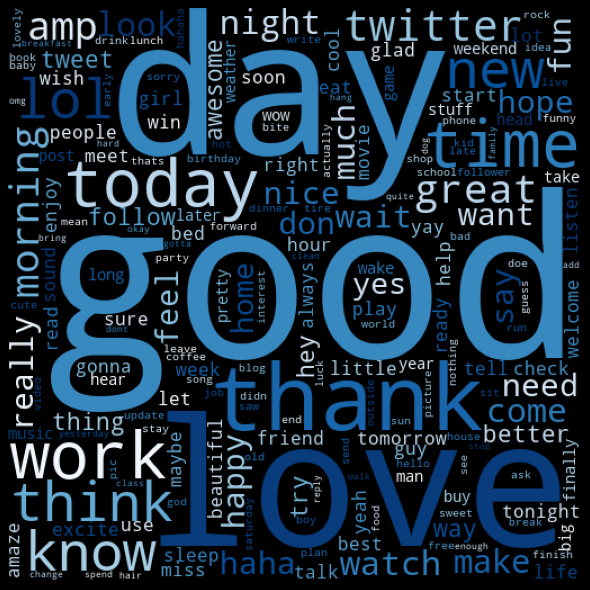

In [0]:
print('\n\t\t\t NON-DEPRESSIVE WORDS')
print('\t\t\t ********************\n')

plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(non_depressive_wc1)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


			 MILDLY-DEPRESSIVE WORDS
			 ********************



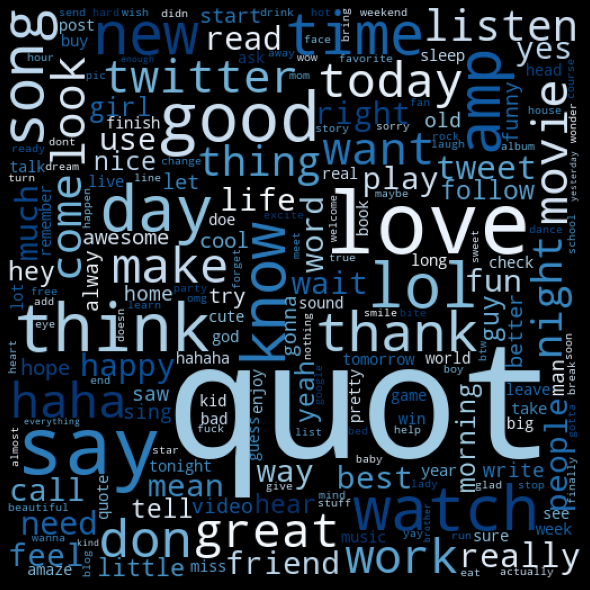

In [0]:
print('\n\t\t\t MILDLY-DEPRESSIVE WORDS')
print('\t\t\t ********************\n')

plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(non_depressive_wc2)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


			 NORMALLY-DEPRESSIVE WORDS
			 *************************



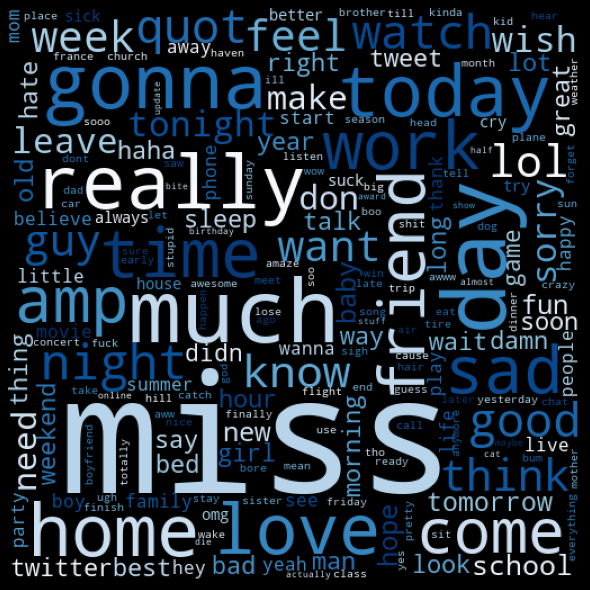

In [0]:
print('\n\t\t\t NORMALLY-DEPRESSIVE WORDS')
print('\t\t\t *************************\n')

plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(normally_depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


			 EXTREMELY-DEPRESSIVE WORDS
			 **************************



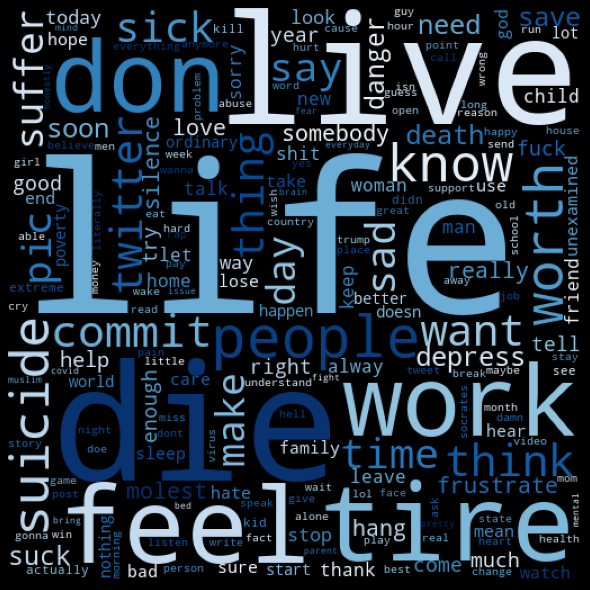

In [0]:
print('\n\t\t\t EXTREMELY-DEPRESSIVE WORDS')
print('\t\t\t **************************\n')

plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(extremely_depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Merging Datasets

#### Importing Saved Datasets

In [0]:
x_non = pd.read_csv(BASE_PATH + '/Relabelled_Dataset/non_depressed_ds_new_lbl0.csv')
x_mild = pd.read_csv(BASE_PATH + '/Relabelled_Dataset/mildly_depressed_ds_new_lbl1.csv')
x_norm = pd.read_csv(BASE_PATH + '/Relabelled_Dataset/normally_depressed_ds_new_lbl2.csv')
x_xtreme = pd.read_csv(BASE_PATH + '/Relabelled_Dataset/extremely_depressed_ds_new_lbl3.csv')


## Merging and Accessing Skewness

In [0]:
# Merging datasets
df = pd.concat([x_non[['username', 'cleaned_tweet', 'new_label']][:-4096], 
                x_mild[['username', 'cleaned_tweet', 'new_label']],
                x_norm[['username', 'cleaned_tweet', 'new_label']],
                x_xtreme[['username', 'cleaned_tweet', 'new_label']]
                ], axis=0)

df.new_label = df.new_label.astype(np.int64)

print('Shape of entire dataset ', df.shape, '\n')

Shape of entire dataset  (1600000, 3) 



In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 764023
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   username       1600000 non-null  object
 1   cleaned_tweet  1600000 non-null  object
 2   new_label      1600000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 48.8+ MB


In [0]:
df.new_label.value_counts()

0    747817
3    737685
2     62315
1     52183
Name: new_label, dtype: int64

Text(0, 0.5, 'COUNT')

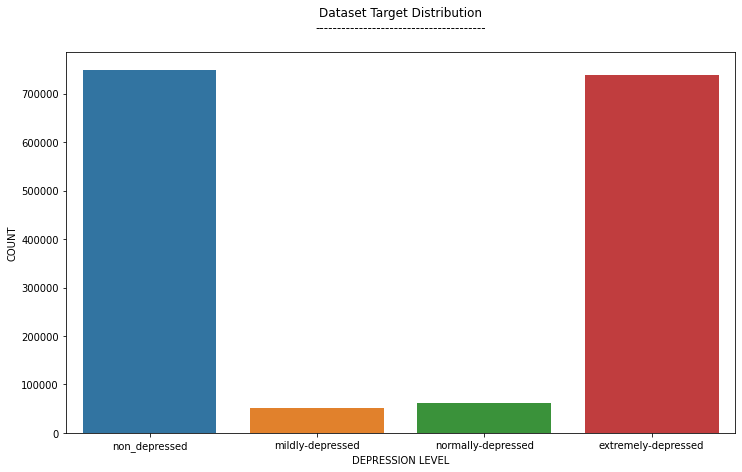

In [0]:
# Investing Data Distribution
val_counts = df.new_label.value_counts()
val_counts = [val_counts[0], val_counts[1], val_counts[2], val_counts[3]]

plt.figure(figsize=(12,7))
sns.barplot(x=['non_depressed', 'mildly-depressed', 'normally-depressed', 'extremely-depressed'], y=val_counts)
plt.title('Dataset Target Distribution\n---------------------------------------\n')
plt.xlabel('DEPRESSION LEVEL')
plt.ylabel('COUNT')


# Sampling dataset due to RAM Constraint and Skewness
We are sampling 80,000 observations. 20,000 each of non-depressed, mildly-depressed, normally-depressed and extremely-depressed observations

This sampling was necessary because even Google colab RAM could not handle the compute necessary to work on 1.6M observations (especially using BOW and TfIdf), Also, the data distribution is greatly skewed to the two extreme sides.

## Balancing the Dataset to Eliminate Skewness

In [0]:
# Merging datasets
df2 = pd.concat([x_non[['username', 'cleaned_tweet', 'new_label']][:20000], 
                x_mild[['username', 'cleaned_tweet', 'new_label']][:20000],
                x_norm[['username', 'cleaned_tweet', 'new_label']][:20000], 
                x_xtreme[['username', 'cleaned_tweet', 'new_label']][:20000], 
                ], axis=0)

df2.new_label = df2.new_label.astype(np.int64)

print('Shape of entire dataset ', df2.shape, '\n')

Shape of entire dataset  (80000, 3) 



In [0]:
df2.new_label.value_counts()

3    20000
2    20000
1    20000
0    20000
Name: new_label, dtype: int64

Text(0, 0.5, 'COUNT')

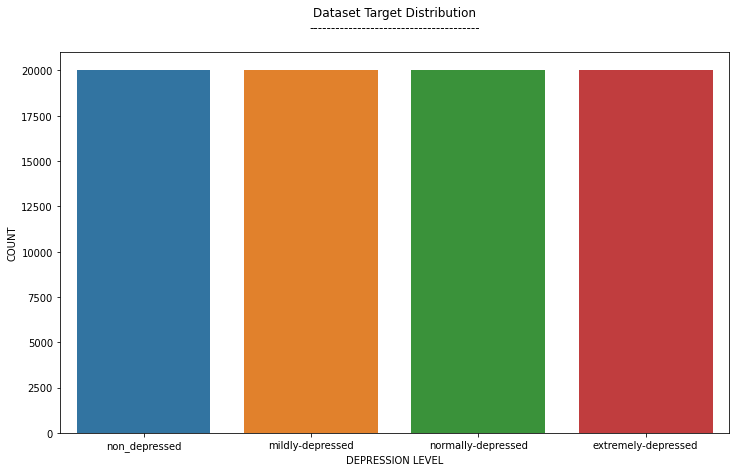

In [0]:
# Investigating Data Distribution
val_counts = df2.new_label.value_counts()
val_counts = [val_counts[0], val_counts[1], val_counts[2], val_counts[3]]

plt.figure(figsize=(12,7))
sns.barplot(x=['non_depressed', 'mildly-depressed', 'normally-depressed', 'extremely-depressed'], y=val_counts)
plt.title('Dataset Target Distribution\n---------------------------------------\n')
plt.xlabel('DEPRESSION LEVEL')
plt.ylabel('COUNT')

# Splitting Dataset into Training set and Testing set.
We use 80% for training and 20% for testing

In [0]:
X = df2.drop('new_label', axis=1)
y = df2.new_label

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=(1 - TRAIN_SIZE), random_state=80)

print('Xtrain ', Xtrain.shape)
print('ytrain ', ytrain.shape)

print('\nXtest ', Xtest.shape)
print('ytest ', ytest.shape)


Xtrain  (64000, 2)
ytrain  (64000,)

Xtest  (16000, 2)
ytest  (16000,)


In [0]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64000 entries, 11838 to 17583
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   username       64000 non-null  object
 1   cleaned_tweet  64000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [0]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 10347 to 6753
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   username       16000 non-null  object
 1   cleaned_tweet  16000 non-null  object
dtypes: object(2)
memory usage: 375.0+ KB


In [0]:
# Samples of Train Set (tweet)
Xtrain.head()

,username,cleaned_tweet
4323,makeupper,yay follow look forward blog update
8823,aekins,btb09 sound good come grab chat day great face...
10557,StaceyKitson,let know love hope life treat xxx
1209,Scyranth,wholeheartedly agree
28109,hollyhydraulics,shut byue


In [0]:
# Labels of Train set (labels)
ytrain.head()

4323     0
8823     0
10557    0
1209     0
28109    2
Name: new_label, dtype: int64

# ENCODING Tweets

## METHOD 1: BAG OF WORD (BOW) MODEL
Sparse Matrix

### Creating Bag Of Words (BOW) model (Sparse Matrix)

In [0]:
%%time
bow_X_train = createBOWModel2(ds=Xtrain, tweet_feature_name='cleaned_tweet',  n_features=300)
bow_X_test = createBOWModel2(ds=Xtest, tweet_feature_name='cleaned_tweet',  n_features=300)

CPU times: user 790 ms, sys: 73.1 ms, total: 863 ms
Wall time: 862 ms


In [0]:
# Peeping into the Sparse Matrix
pd.DataFrame(bow_X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Peeping into the Sparse Matrix
pd.DataFrame(bow_X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## METHOD 2: ENCODING TEXT USING TOKENIZER

In [0]:
%%time
# Initializing Tokenizer
#tokenizer = Tokenizer(num_words=MAX_NO_WORDS)
tokenizer = Tokenizer()

# Fitting tokenizer to training set 
tokenizer.fit_on_texts(Xtrain.cleaned_tweet)

# Getting Vocabulary Size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size (Total Unique Words): ', vocab_size)

#Getting Average Sequence Length
avg_len_tweets = int(np.mean([len(text) for text in Xtrain.cleaned_tweet]))
print(f"\nAverage Length of tweets: {avg_len_tweets}\n")

Vocabulary Size (Total Unique Words):  45827

Average Length of tweets: 53

CPU times: user 839 ms, sys: 5.75 ms, total: 845 ms
Wall time: 844 ms


### Showing N most-occuring word (in decreasing count order)

In [0]:
def get_word_count(tokenizer_obj, n):
  """
    tokenizer: fitted tokenizer object
    N: size of most occuring words counts to return 
  """
  word_counts_result = tokenizer_obj.word_counts
  words = [x for (x,y) in list(word_counts_result.items())]
  counts = [y for (x,y) in list(word_counts_result.items())]

  dico = {'words':words, 'counts':counts}
  word_count_df = pd.DataFrame(dico).sort_values(by='counts', axis=0, ascending=False)
  word_count_df.index = list(range(len(word_count_df)))

  print(f'{n} Most Occurring Words Are: \n')
  return word_count_df[:n]

In [0]:
get_word_count(tokenizer, 20)

20 Most Occurring Words Are: 



,words,counts
0,just,20771
1,day,19080
2,get,5277
3,like,5221
4,life,4812
5,good,4746
6,work,4710
7,feel,3421
8,today,3322
9,happy,3312


### Generating Sequences for words in training and test set

In [0]:
%%time
# Generating Sequences from text, of 300 fixed-lehgth size (necessary for machine learning model training and prediction)
toknzr_X_train = pad_sequences(tokenizer.texts_to_sequences(Xtrain.cleaned_tweet), maxlen=(avg_len_tweets - 10))#avg_len_tweets + 3)  # maxlen=300
toknzr_X_test =  pad_sequences(tokenizer.texts_to_sequences(Xtest.cleaned_tweet), maxlen=(avg_len_tweets - 10))#avg_len_tweets + 3)  # maxlen=300

# Checking the shape of tokenized Vector of words
print(f'Shape of Xtrain: {toknzr_X_train.shape}')
print(f'Shape of Xtest: {toknzr_X_test.shape}')
print('\n')

# Converting to Dataframe
toknzr_X_train = pd.DataFrame(data=toknzr_X_train, index=Xtrain.index)
toknzr_X_test = pd.DataFrame(data=toknzr_X_test, index=Xtest.index)

Shape of Xtrain: (64000, 43)
Shape of Xtest: (16000, 43)


CPU times: user 1.1 s, sys: 767 µs, total: 1.1 s
Wall time: 1.1 s


In [0]:
# Checking any columns made up of only zeroes (i.e. has no value at all)
def check_zero_cols(dataset):
  cols_with_vals = []
  for col_lbl in dataset.columns:
    if True not in list(dataset[col_lbl] > 0):
      cols_with_vals.append('yes')
    else:
      cols_with_vals.append('no')

  print('Columns Check (Checking if any column contain only Zero values):\n')
  print(cols_with_vals)

In [0]:
# Checking zero-only columns for train set (Note: Just 1 column is not bad)
check_zero_cols(toknzr_X_train)

Columns Check (Checking if any column contain only Zero values):

['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [0]:
# Checking zero-only columns for train set
check_zero_cols(toknzr_X_test)

Columns Check (Checking if any column contain only Zero values):

['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


### Viewing the Encoded Tweets (Using Tokenizer)

In [0]:
# Encoded Training Tweets
toknzr_X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
11838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,367,41,17,236
4544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,765
4305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,16559,269,1965,11412
13095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,301,185,329,280,878,4,364,102,582,720,9165,1424,280,1424,9166,870,280,878,364,15,11
17392,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16560,16561,16562,2152,238,1425,157


In [0]:
toknzr_X_train.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
15299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45825,2,161
8714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180,1043,241,14895,531,45826,53,118,2247,49,396,1559,556,577,65,783
19366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,1130,518
18076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,1088,1,685,10,421,1240,1088,148
17583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,179,733,65


In [0]:
# Encoded Test tweets (Using Tokenizer)
toknzr_X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
10347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,725,1,824,2151,1,133,360,840,20,1035,25976,4,13961
10975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,12206,1851,1851,44,60,6,35,171,1296,1,4546,1
10813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,5,41,17,48,18,53
19462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,252
5662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,562,63,38,7305,2993,2,666,306,86


In [0]:
toknzr_X_test.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
14067,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,598,37,1,1,1683,535
18634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,453,275,75,90,80,2,114,107
11036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,5,41,17,8214,13622,12575,12574,12574,12575
13684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12898,58,310,330,27,2,25,55,330,42,65
6753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,5649,71,32


## METHOD 3: USING TF-IDF VECTORIZER MODEL 
TF-IDF = Term Frequency - Inverse Document Frequency.

Transforming Tweets, in order to have fixed length numeric data, necessary for ML models training

In [0]:
%%time
# Instantiation
#MAX_NUM_WORDS = 10000
MAX_NUM_WORDS = 10000
tfidf = TfidfVectorizer(max_features=MAX_NUM_WORDS)

# Generating Corpus
corpus_train = Xtrain.cleaned_tweet.values.astype('U')
corpus_test =  Xtest.cleaned_tweet.values.astype('U')

# Fitting the data model
tfidf_X_train = tfidf.fit_transform(corpus_train)
tfidf_X_test = tfidf.transform(corpus_test)

# Converting to dataframe
tfidf_X_train = pd.DataFrame(data=tfidf_X_train.toarray(), index=Xtrain.index)
tfidf_X_test = pd.DataFrame(data=tfidf_X_test.toarray(), index=Xtest.index)


print(f'TfIdf Xtrain {tfidf_X_train.shape}')
print(f'TfIdf Xtest {tfidf_X_test.shape}')
print('\n')

TfIdf Xtrain (64000, 10000)
TfIdf Xtest (16000, 10000)


CPU times: user 1.66 s, sys: 2.52 s, total: 4.19 s
Wall time: 4.2 s


### Viewing Encoded tweets Train Set (using TfIdf)

In [0]:
tfidf_X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
11838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
tfidf_X_train.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
15299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SCALING (with MinMaxScaler)
This is done to: 
* Reduce the effect of outliers on the model (preventing feature(s) with extremely large or small values from dominating the model)
* Reduce Computational complexity and improve efficiency by saving compute resources and memory

In [0]:
%%time
# Instantiating MinMaxScaler
scale = MinMaxScaler()

# Scaling Tokenizer-Encoded Tweets
toknzr_X_train = scale.fit_transform(toknzr_X_train)
toknzr_X_test = scale.transform(toknzr_X_test)

# Scaling TfIdf-Encoded Tweets
tfidf_X_train = scale.fit_transform(tfidf_X_train)
tfidf_X_test = scale.transform(tfidf_X_test)

# Scaling BOW-Encoded Tweets
bow_X_train = scale.fit_transform(bow_X_train)
bow_X_test = scale.transform(bow_X_test)

CPU times: user 5.44 s, sys: 1.31 s, total: 6.75 s
Wall time: 6.75 s


# BUILDING THE MODELS
## PART 1: Without Dimensionality Reduction

# Building the Models

## Decision Tree Classifier Model

### with Tokenizer (BOW) Model

In [0]:
%%time
#Instantiation
dtree = DecisionTreeClassifier()

# Training the model
dtree.fit(toknzr_X_train, ytrain)


# Grid Search Parameters
#knn_params = {'n_neighbors': list(range(2,50))}

#Initializing GridSearch
#grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_params, scoring='accuracy')

#print('KNN Best Parameters: ', grid_knn.best_params_)




CPU times: user 1.28 s, sys: 48 µs, total: 1.28 s
Wall time: 1.28 s


In [0]:
%%time
# Making Predictions
dtree_pred = dtree.predict(toknzr_X_test)

CPU times: user 6.62 ms, sys: 0 ns, total: 6.62 ms
Wall time: 6.23 ms


### with Tf-IDF Model

In [0]:
%%time
# Instantiation
dtree_tf = DecisionTreeClassifier()

# Training the model
dtree_tf.fit(tfidf_X_train, ytrain)

CPU times: user 16min 58s, sys: 486 ms, total: 16min 58s
Wall time: 16min 59s


In [0]:
%%time
# Making Predictions
dtree_pred_tf = dtree_tf.predict(tfidf_X_test)

CPU times: user 375 ms, sys: 4 ms, total: 379 ms
Wall time: 379 ms


### with BOW Model

In [0]:
%%time
# Instantiation
dtree_bow = DecisionTreeClassifier()

# Training the model
dtree_bow.fit(bow_X_train, ytrain)

CPU times: user 12.6 s, sys: 975 µs, total: 12.6 s
Wall time: 12.6 s


In [0]:
%%time
# Making Predictions
dtree_pred_bow = dtree_bow.predict(bow_X_test)

CPU times: user 17.1 ms, sys: 1 ms, total: 18.1 ms
Wall time: 17.9 ms


## Naive Baye's Classifier NB Model

### with Tokenizer Model

In [0]:
%%time
# Instantiation
nb = GaussianNB()

# Training
nb.fit(toknzr_X_train, ytrain)


#svc_params = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
#grid_svc = GridSearchCV(SVC(), param_grid=svc_params, scoring='accuracy')

#print('SVC Best Parameters: ', grid_svc.best_params_)


CPU times: user 42.8 ms, sys: 2 ms, total: 44.8 ms
Wall time: 44.4 ms


In [0]:
# Prediction
nb_pred = nb.predict(toknzr_X_test)

### With Tf-IDF Model

In [0]:
%%time
# Instantiation
nb_tf = GaussianNB()

# Training
nb_tf.fit(tfidf_X_train, ytrain)

CPU times: user 6.49 s, sys: 933 ms, total: 7.42 s
Wall time: 7.43 s


In [0]:
%%time
# Prediction
nb_pred_tf = nb_tf.predict(tfidf_X_test)

CPU times: user 2.89 s, sys: 1 ms, total: 2.89 s
Wall time: 2.89 s


### With BOW Model

In [0]:
%%time
# Instantiation
nb_bow = GaussianNB()

# Training
nb_bow.fit(bow_X_train, ytrain)

CPU times: user 246 ms, sys: 8.01 ms, total: 254 ms
Wall time: 254 ms


In [0]:
%%time
# Prediction
nb_pred_bow = nb_bow.predict(bow_X_test)

CPU times: user 114 ms, sys: 3 ms, total: 117 ms
Wall time: 116 ms


## Random Forest Model

### With Tokenizer Model

In [0]:
%%time
# Instantiation
rf = RandomForestClassifier()

# Training
rf.fit(toknzr_X_train, ytrain)


#rf_params = {'n_estimators': list(range(10,250,5)), 'criterion': ['gini', 'entropy']}
#grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, scoring='accuracy')

#print('RF Best Parameters: ', grid_rf.best_params_)


CPU times: user 12.6 s, sys: 104 ms, total: 12.7 s
Wall time: 12.7 s


In [0]:
# Predictions
rf_pred = rf.predict(toknzr_X_test)

### With Tf-IDF Model

In [0]:
%%time
# Instantiating model
rf_tf = RandomForestClassifier()

# Training
rf_tf.fit(tfidf_X_train, ytrain)

#rf_params = {'n_estimators': list(range(10,250,5)), 'criterion': ['gini', 'entropy']}
#grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, scoring='accuracy')

#print('SVC Best Parameters: ', grid_rf.best_params_)

CPU times: user 10min 19s, sys: 376 ms, total: 10min 20s
Wall time: 10min 20s


In [0]:
%%time
# Predictions
rf_pred_tf = rf_tf.predict(tfidf_X_test)

CPU times: user 3.73 s, sys: 6.99 ms, total: 3.74 s
Wall time: 3.74 s


### With BOW Model

In [0]:
%%time
# Instantiating model
rf_bow = RandomForestClassifier()

# Training
rf_bow.fit(bow_X_train, ytrain)

#rf_params = {'n_estimators': list(range(10,250,5)), 'criterion': ['gini', 'entropy']}
#grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, scoring='accuracy')

#print('SVC Best Parameters: ', grid_rf.best_params_)

CPU times: user 53.3 s, sys: 268 ms, total: 53.6 s
Wall time: 53.6 s


In [0]:
%%time
# Predictions
rf_pred_bow = rf_bow.predict(bow_X_test)

CPU times: user 657 ms, sys: 2 ms, total: 659 ms
Wall time: 658 ms


# Saving Trained Models

In [0]:
# Save using pickle
pickle.dump(dtree, open(BASE_PATH + '/Models/dtree_model_tokenzr_pickle.sav', 'wb'))
pickle.dump(dtree_tf, open(BASE_PATH + '/Models/dtree_model_tfidf_pickle.sav', 'wb'))
pickle.dump(dtree_bow, open(BASE_PATH + '/Models/dtree_model_bow_pickle.sav', 'wb'))

pickle.dump(nb, open(BASE_PATH + '/Models/nb_model_tokenzr_pickle.sav', 'wb'))
pickle.dump(nb_tf, open(BASE_PATH + '/Models/nb_model_tfidf_pickle.sav', 'wb'))
pickle.dump(nb_bow, open(BASE_PATH + '/Models/nb_model_bow_pickle.sav', 'wb'))

pickle.dump(rf, open(BASE_PATH + '/Models/rf_model_tokenzr_pickle.sav', 'wb'))
pickle.dump(rf_tf, open(BASE_PATH + '/Models/rf_model_tfidf_pickle.sav', 'wb'))
pickle.dump(rf_bow, open(BASE_PATH + '/Models/rf_model_bow_pickle.sav', 'wb'))

# Save using joblib
joblib.dump(dtree, BASE_PATH + '/Models/dtree_model_tokenzr_joblib.sav')
joblib.dump(dtree_tf, BASE_PATH + '/Models/dtree_model_tfidf_joblib.sav')
joblib.dump(dtree_bow, BASE_PATH + '/Models/dtree_model_bow_joblib.sav')

joblib.dump(nb, BASE_PATH + '/Models/nb_model_tokenzr_joblib.sav')
joblib.dump(nb_tf, BASE_PATH + '/Models/nb_model_tfidf_joblib.sav')
joblib.dump(nb_bow, BASE_PATH + '/Models/nb_model_bow_joblib.sav')

joblib.dump(rf, BASE_PATH + '/Models/rf_model_tokenzr_joblib.sav')
joblib.dump(rf_tf, BASE_PATH + '/Models/rf_model_tfidf_joblib.sav')
joblib.dump(rf_bow, BASE_PATH + '/Models/rf_model_bow_joblib.sav')


['/content/gdrive/My Drive/Datasets/Sentiment140/Anuoluwa/Models/rf_model_bow_joblib.sav']

## Loading Saved Models

In [0]:
# Pickle
#loaded_rf_model = pickle.load(open(BASE_PATH & '/Models/rf_model_tfidf_joblib.sav', 'rb'))

# Joblib
#loaded_rf_model = joblib.load(BASE_PATH & '/Models/rf_model_tfidf_joblib.sav')


# Model Evaluations

In [0]:
# Utility Function

def conf_normalize_percentage(conf_mat):
  size = len(conf_mat[0])
  norm_cf = np.zeros(shape=(size,size), dtype=np.float)
  for row in range(size):
    for col in range(size):
      norm_cf[row][col] = conf_mat[row][col] / conf_mat[row].sum()

  return norm_cf

In [0]:
metrics = ["Accuracy", "Precision", "Recall", "R-Score", "F-Measure"] # "ROC-AUC", "F-Measure"]

## Decision Tree Classifier (DTree) Evaluations

### Tokenizer

		Decision Tree Classifier (DTree) (Tokenizer)
		********************************************

		Classification Report
		-----------------------
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      3949
           1       0.98      0.98      0.98      3989
           2       0.94      0.95      0.94      4044
           3       0.73      0.70      0.71      4018

    accuracy                           0.84     16000
   macro avg       0.84      0.84      0.84     16000
weighted avg       0.84      0.84      0.84     16000







Text(33.0, 0.5, 'True Label')

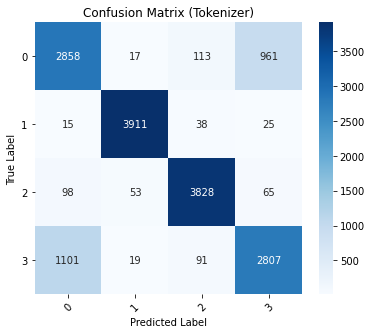

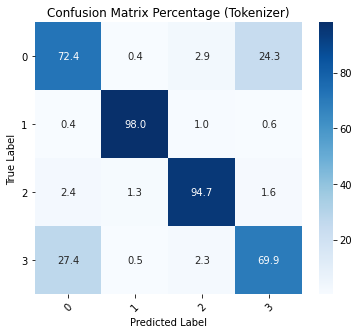

In [0]:
# DTree for Tokenizer Model
cf_tok = confusion_matrix(ytest, dtree_pred)
cr_tok = classification_report(ytest, dtree_pred)

# Classification Report
print('\t\tDecision Tree Classifier (DTree) (Tokenizer)')
print('\t\t********************************************\n')
print('\t\tClassification Report\n\t\t-----------------------\n', cr_tok)


# Confusion Matrix
print("\n")
plt.figure(figsize=(6, 5))
sns.heatmap(cf_tok, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Tokenizer)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

print("\n")
plt.figure(figsize=(6, 5))
cf_perc = conf_normalize_percentage(cf_tok) * 100
sns.heatmap(cf_perc, annot=True, fmt='.1f', cmap=plt.cm.Blues)
plt.title("Confusion Matrix Percentage (Tokenizer)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [0]:
dtree_eval_tok = [round(accuracy_score(ytest, dtree_pred),2),
               round(precision_score(ytest, dtree_pred, average='macro'),2),
               round(recall_score(ytest, dtree_pred, average='micro'),2),
               round(r2_score(ytest, dtree_pred),2),
               #round(roc_auc_score(ytest, dtree_pred, average='macro', multi_class='ovr'),2),
               round(f1_score(ytest, dtree_pred, average='micro'),2)
              ]

dtree_result_tok = pd.DataFrame(dtree_eval_tok, index=metrics, columns=['DTree_Tokenizer'])
dtree_result_tok.to_csv(RESULT_PATH + '/dtree_result_tok.csv')
dtree_result_tok

,DTree_Tokenizer
Accuracy,0.84
Precision,0.84
Recall,0.84
R-Score,0.00
F-Measure,0.84


### Tf-IDF

		Decision Tree Classifier (DTree) (TF-IDF)
		*****************************************

		Classification Report
		-----------------------
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      3949
           1       0.99      0.99      0.99      3989
           2       0.98      0.99      0.98      4044
           3       0.90      0.86      0.88      4018

    accuracy                           0.93     16000
   macro avg       0.93      0.93      0.93     16000
weighted avg       0.93      0.93      0.93     16000









Text(33.0, 0.5, 'True Label')

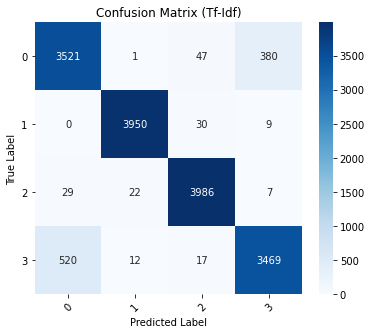

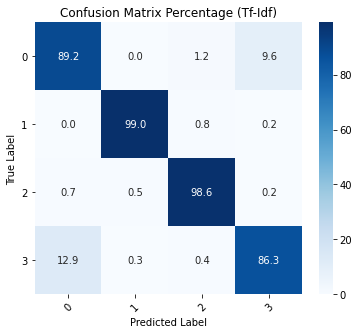

In [0]:
# DTree  for TF-IDF Model
cf_tf = confusion_matrix(ytest, dtree_pred_tf)
cr_tf = classification_report(ytest, dtree_pred_tf)

# Classification Report
print('\t\tDecision Tree Classifier (DTree) (TF-IDF)')
print('\t\t*****************************************\n')
print('\t\tClassification Report\n\t\t-----------------------\n', cr_tf)
print('\n')


# Confusion Matrix
print("\n")
plt.figure(figsize=(6, 5))
sns.heatmap(cf_tf, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Tf-Idf)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

print("\n")
plt.figure(figsize=(6, 5))
cf_perc = conf_normalize_percentage(cf_tf) * 100
sns.heatmap(cf_perc, annot=True, fmt='.1f', cmap=plt.cm.Blues)
plt.title("Confusion Matrix Percentage (Tf-Idf)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [0]:
dtree_eval_tfidf = [round(accuracy_score(ytest, dtree_pred_tf),2),
                 round(precision_score(ytest, dtree_pred_tf, average='macro'),2),
                 round(recall_score(ytest, dtree_pred_tf, average='macro'),2),
                 round(r2_score(ytest, dtree_pred_tf),2),
                 #round(roc_auc_score(ytest, dtree_pred_tf, average='macro'),2),
                 round(f1_score(ytest, dtree_pred_tf, average='macro'),2)
                ]

dtree_result_tfidf = pd.DataFrame(dtree_eval_tfidf, index=metrics, columns=['DTree_TfIdf'])
dtree_result_tfidf.to_csv(RESULT_PATH + '/dtree_result_tfidf.csv')
dtree_result_tfidf

,DTree_TfIdf
Accuracy,0.93
Precision,0.93
Recall,0.93
R-Score,0.57
F-Measure,0.93


### BOW

		Decision Tree Classifier (DTree) (BOW)
		**************************************

		Classification Report
		-----------------------
               precision    recall  f1-score   support

           0       0.37      0.72      0.49      3949
           1       0.00      0.00      0.00      3989
           2       0.00      0.00      0.00      4044
           3       0.22      0.44      0.29      4018

    accuracy                           0.29     16000
   macro avg       0.15      0.29      0.19     16000
weighted avg       0.15      0.29      0.19     16000









/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'True Label')

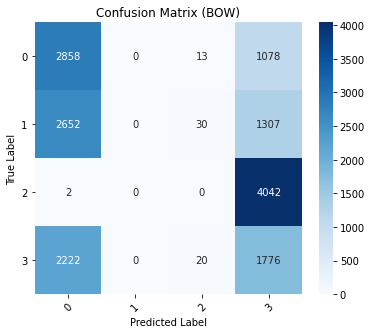

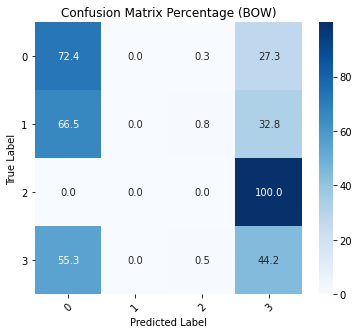

In [0]:
# DTree  for BOW Model
cf_tf = confusion_matrix(ytest, dtree_pred_bow)
cr_tf = classification_report(ytest, dtree_pred_bow)

# Classification Report
print('\t\tDecision Tree Classifier (DTree) (BOW)')
print('\t\t**************************************\n')
print('\t\tClassification Report\n\t\t-----------------------\n', cr_tf)
print('\n')


# Confusion Matrix
print("\n")
plt.figure(figsize=(6, 5))
sns.heatmap(cf_tf, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (BOW)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

print("\n")
plt.figure(figsize=(6, 5))
cf_perc = conf_normalize_percentage(cf_tf) * 100
sns.heatmap(cf_perc, annot=True, fmt='.1f', cmap=plt.cm.Blues)
plt.title("Confusion Matrix Percentage (BOW)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [0]:
dtree_eval_bow = [round(accuracy_score(ytest, dtree_pred_bow),2),
                 round(precision_score(ytest, dtree_pred_bow, average='macro'),2),
                 round(recall_score(ytest, dtree_pred_bow, average='macro'),2),
                 round(r2_score(ytest, dtree_pred_bow),2),
                 #round(roc_auc_score(ytest, dtree_pred_bow, average='macro'),2),
                 round(f1_score(ytest, dtree_pred_bow, average='macro'),2)
                ]

dtree_result_bow = pd.DataFrame(dtree_eval_bow, index=metrics, columns=['DTree_BOW'])
dtree_result_bow.to_csv(RESULT_PATH + '/dtree_result_bow.csv')
dtree_result_bow

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,DTree_BOW
Accuracy,0.29
Precision,0.15
Recall,0.29
R-Score,-1.09
F-Measure,0.19


### Compare DTree Tokenizer vs Tf-IDF vs BOW

In [0]:
dtree_comp = pd.concat([dtree_result_tok, dtree_result_tfidf, dtree_result_bow], axis=1)
dtree_comp.to_csv(RESULT_PATH + '/dtree_comp.csv')
dtree_comp


,DTree_Tokenizer,DTree_TfIdf,DTree_BOW
Accuracy,0.84,0.93,0.29
Precision,0.84,0.93,0.15
Recall,0.84,0.93,0.29
R-Score,0.00,0.57,-1.09
F-Measure,0.84,0.93,0.19


Text(0, 0.5, 'SCORES')

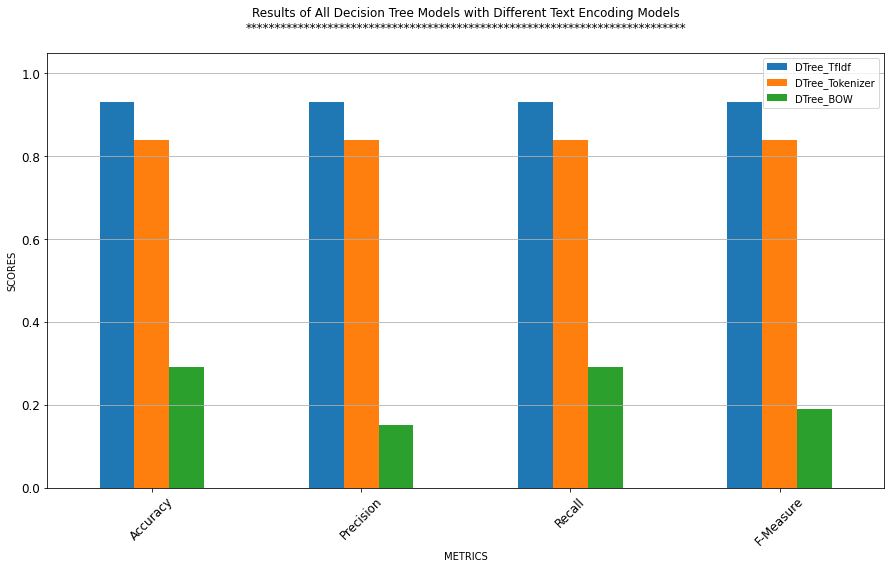

In [0]:
dtree_comp.drop('R-Score', axis=0).T.sort_values(by='Accuracy', ascending=False).T.plot.bar(figsize=(15,8),
                             title='Results of All Decision Tree Models with Different Text Encoding Models\n***************************************************************************\n',
                             fontsize=12,
                             rot=45,
                             grid=True
                            )

plt.ylim(ymax=1.05)
#plt.legend(loc='lower right')
plt.grid(which='major', axis='x')
plt.xlabel('METRICS')
plt.ylabel('SCORES')

## Naive Baye's (NB) Evaluations

### Tokenizer

		Naive Baye's Classifier (NB) (Tokenizer)
		*******************************************

		Classification Report
		-----------------------
               precision    recall  f1-score   support

           0       0.27      0.99      0.42      3949
           1       0.11      0.02      0.03      3989
           2       0.11      0.01      0.02      4044
           3       0.99      0.08      0.14      4018

    accuracy                           0.27     16000
   macro avg       0.37      0.27      0.15     16000
weighted avg       0.37      0.27      0.15     16000







Text(33.0, 0.5, 'True Label')

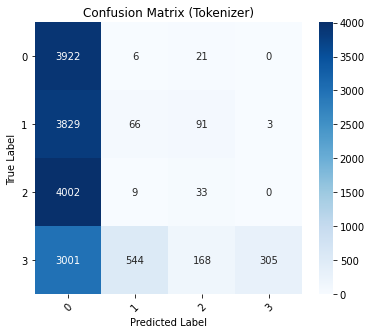

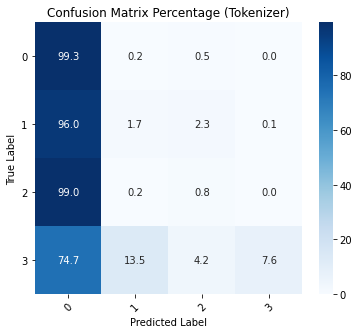

In [0]:
# NB for Tokenizer Model
cf_tok = confusion_matrix(ytest, nb_pred)
cr_tok = classification_report(ytest, nb_pred)

# Classification Report
print('\t\tNaive Baye\'s Classifier (NB) (Tokenizer)')
print('\t\t*******************************************\n')
print('\t\tClassification Report\n\t\t-----------------------\n', cr_tok)


# Confusion Matrix
print("\n")
plt.figure(figsize=(6, 5))
sns.heatmap(cf_tok, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Tokenizer)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

print("\n")
plt.figure(figsize=(6, 5))
cf_perc = conf_normalize_percentage(cf_tok) * 100
sns.heatmap(cf_perc, annot=True, fmt='.1f', cmap=plt.cm.Blues)
plt.title("Confusion Matrix Percentage (Tokenizer)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [0]:
nb_eval_tok = [round(accuracy_score(ytest, nb_pred),2),
               round(precision_score(ytest, nb_pred, average='micro'),2),
               round(recall_score(ytest, nb_pred, average='micro'),2),
               round(r2_score(ytest, nb_pred),2),
               #round(roc_auc_score(ytest, nb_pred),2),
               round(f1_score(ytest, nb_pred, average='micro'),2)
              ]

nb_result_tok = pd.DataFrame(nb_eval_tok, index=metrics, columns=['NB_Tokenizer'])
nb_result_tok.to_csv(RESULT_PATH + '/nb_result_tok.csv')
nb_result_tok

,NB_Tokenizer
Accuracy,0.27
Precision,0.27
Recall,0.27
R-Score,-1.48
F-Measure,0.27


### Tf-IDF

		Naive Baye's Classifier (NB) (TF-IDF)
		****************************************

		Classification Report
		-----------------------
               precision    recall  f1-score   support

           0       0.33      0.21      0.26      3949
           1       0.52      0.09      0.16      3989
           2       0.34      0.86      0.48      4044
           3       0.78      0.44      0.56      4018

    accuracy                           0.40     16000
   macro avg       0.49      0.40      0.37     16000
weighted avg       0.49      0.40      0.37     16000







Text(33.0, 0.5, 'True Label')

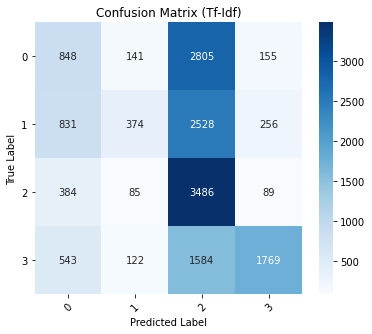

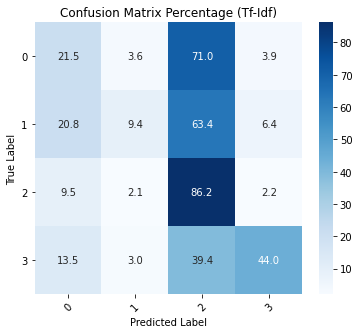

In [0]:
# NB  for TF-IDF Model
cf_tf = confusion_matrix(ytest, nb_pred_tf)
cr_tf = classification_report(ytest, nb_pred_tf)

# Classification Report
print('\t\tNaive Baye\'s Classifier (NB) (TF-IDF)')
print('\t\t****************************************\n')
print('\t\tClassification Report\n\t\t-----------------------\n', cr_tf)


# Confusion Matrix
print("\n")
plt.figure(figsize=(6, 5))
sns.heatmap(cf_tf, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Tf-Idf)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

print("\n")
plt.figure(figsize=(6, 5))
cf_perc = conf_normalize_percentage(cf_tf) * 100
sns.heatmap(cf_perc, annot=True, fmt='.1f', cmap=plt.cm.Blues)
plt.title("Confusion Matrix Percentage (Tf-Idf)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [0]:
nb_eval_tfidf = [round(accuracy_score(ytest, nb_pred_tf),2),
                 round(precision_score(ytest, nb_pred_tf, average='micro'),2),
                 round(recall_score(ytest, nb_pred_tf, average='micro'),2),
                 round(r2_score(ytest, nb_pred_tf),2),
                 #round(roc_auc_score(ytest, nb_pred_tf),2),
                 round(f1_score(ytest, nb_pred_tf, average='micro'),2)
                ]

nb_result_tfidf = pd.DataFrame(nb_eval_tfidf, index=metrics, columns=['NB_TfIdf'])
nb_result_tfidf.to_csv(RESULT_PATH + '/nb_result_tfidf.csv')
nb_result_tfidf

,NB_TfIdf
Accuracy,0.40
Precision,0.40
Recall,0.40
R-Score,-0.29
F-Measure,0.40


### BOW

		Naive Baye's Classifier (NB) (BOW)
		************************************

		Classification Report
		-----------------------
               precision    recall  f1-score   support

           0       0.69      0.29      0.41      3949
           1       0.59      0.46      0.52      3989
           2       0.00      0.00      0.00      4044
           3       0.24      0.57      0.34      4018

    accuracy                           0.33     16000
   macro avg       0.38      0.33      0.31     16000
weighted avg       0.38      0.33      0.31     16000







Text(33.0, 0.5, 'True Label')

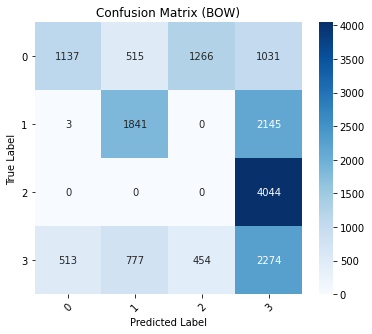

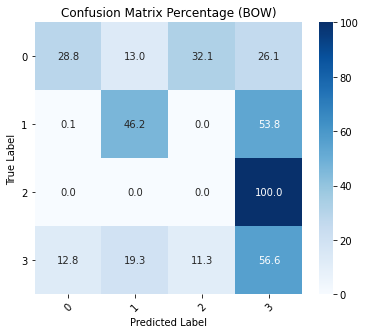

In [0]:
# NB  for BOW Model
cf_tf = confusion_matrix(ytest, nb_pred_bow)
cr_tf = classification_report(ytest, nb_pred_bow)

# Classification Report
print('\t\tNaive Baye\'s Classifier (NB) (BOW)')
print('\t\t************************************\n')
print('\t\tClassification Report\n\t\t-----------------------\n', cr_tf)


# Confusion Matrix
print("\n")
plt.figure(figsize=(6, 5))
sns.heatmap(cf_tf, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (BOW)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

print("\n")
plt.figure(figsize=(6, 5))
cf_perc = conf_normalize_percentage(cf_tf) * 100
sns.heatmap(cf_perc, annot=True, fmt='.1f', cmap=plt.cm.Blues)
plt.title("Confusion Matrix Percentage (BOW)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [0]:
nb_eval_bow = [round(accuracy_score(ytest, nb_pred_bow),2),
                 round(precision_score(ytest, nb_pred_bow, average='micro'),2),
                 round(recall_score(ytest, nb_pred_bow, average='micro'),2),
                 round(r2_score(ytest, nb_pred_bow),2),
                 #round(roc_auc_score(ytest, nb_pred_bow),2),
                 round(f1_score(ytest, nb_pred_bow, average='micro'),2)
                ]

nb_result_bow = pd.DataFrame(nb_eval_bow, index=metrics, columns=['NB_BOW'])
#nb_result_bow.to_csv(RESULT_PATH + '/nb_result_bow.csv')
nb_result_bow

,NB_BOW
Accuracy,0.33
Precision,0.33
Recall,0.33
R-Score,-0.79
F-Measure,0.33


### Compare NB Tokenizer vs Tf-IDF vs BOW

In [0]:
nb_comp = pd.concat([nb_result_tok, nb_result_tfidf, nb_result_bow], axis=1)
#nb_comp.to_csv(RESULT_PATH + '/nb_comp.csv')
nb_comp


,NB_Tokenizer,NB_TfIdf,NB_BOW
Accuracy,0.27,0.40,0.33
Precision,0.27,0.40,0.33
Recall,0.27,0.40,0.33
R-Score,-1.48,-0.29,-0.79
F-Measure,0.27,0.40,0.33


Text(0, 0.5, 'SCORES')

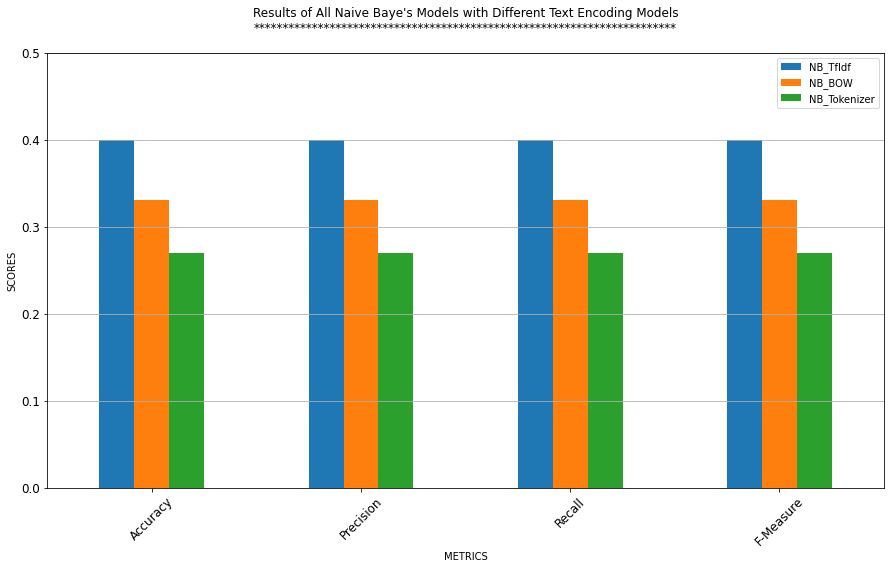

In [0]:
nb_comp.drop('R-Score', axis=0).T.sort_values(by='Accuracy', ascending=False).T.plot.bar(figsize=(15,8),
                             title='Results of All Naive Baye\'s Models with Different Text Encoding Models\n************************************************************************\n',
                             fontsize=12,
                             rot=45,
                             grid=True
                            )

plt.ylim(ymax=0.5)
#plt.legend(loc='upper center')
plt.grid(which='major', axis='x')
plt.xlabel('METRICS')
plt.ylabel('SCORES')

## Random Forest Evaluations

### Tokenizer

		Random Forest (Tokenizer)
		*************************

		Classification Report
		-----------------------
               precision    recall  f1-score   support

           0       0.74      0.86      0.80      3949
           1       0.98      1.00      0.99      3989
           2       0.98      0.98      0.98      4044
           3       0.85      0.70      0.77      4018

    accuracy                           0.89     16000
   macro avg       0.89      0.89      0.88     16000
weighted avg       0.89      0.89      0.88     16000







Text(33.0, 0.5, 'True Label')

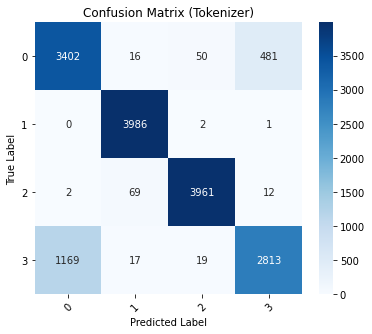

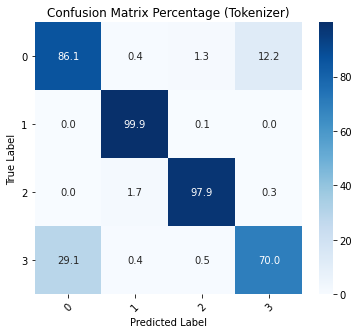

In [0]:
# Random Forest  for Tokenizer Model
cf_tok = confusion_matrix(ytest, rf_pred)
cr_tok = classification_report(ytest, rf_pred)

# Classification Report
print('\t\tRandom Forest (Tokenizer)')
print('\t\t*************************\n')
print('\t\tClassification Report\n\t\t-----------------------\n', cr_tok)


# Confusion Matrix
print("\n")
plt.figure(figsize=(6, 5))
sns.heatmap(cf_tok, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Tokenizer)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

print("\n")
plt.figure(figsize=(6, 5))
cf_perc = conf_normalize_percentage(cf_tok) * 100
sns.heatmap(cf_perc, annot=True, fmt='.1f', cmap=plt.cm.Blues)
plt.title("Confusion Matrix Percentage (Tokenizer)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [0]:
rf_eval_tok = [round(accuracy_score(ytest, rf_pred),2),
               round(precision_score(ytest, rf_pred, average='micro'),2),
               round(recall_score(ytest, rf_pred, average='micro'),2),
               round(r2_score(ytest, rf_pred),2),
               #round(roc_auc_score(ytest, rf_pred),2),
               round(f1_score(ytest, rf_pred, average='micro'),2)
              ]

rf_result_tok = pd.DataFrame(rf_eval_tok, index=metrics, columns=['RF_Tokenizer'])
#rf_result_tok.to_csv(RESULT_PATH + '/rf_result_tok.csv')
rf_result_tok

,RF_Tokenizer
Accuracy,0.89
Precision,0.89
Recall,0.89
R-Score,0.24
F-Measure,0.89


### Tf-IDF

		Random Forest (TF-IDF)
		**********************

		Classification Report
		-----------------------
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      3949
           1       0.99      0.99      0.99      3989
           2       0.98      1.00      0.99      4044
           3       0.97      0.85      0.90      4018

    accuracy                           0.95     16000
   macro avg       0.95      0.95      0.95     16000
weighted avg       0.95      0.95      0.95     16000







Text(33.0, 0.5, 'True Label')

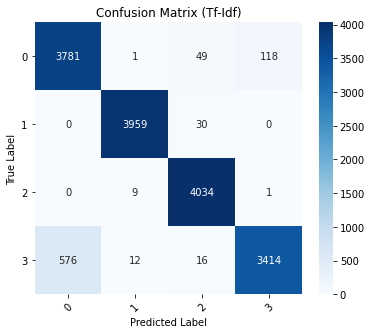

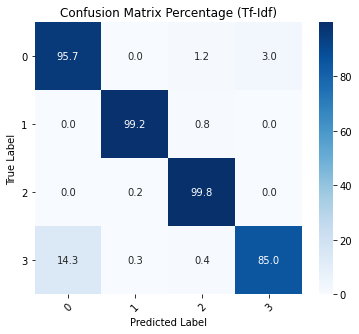

In [0]:
# Random Forest  for TF-IDF Model
cf_tf = confusion_matrix(ytest, rf_pred_tf)
cr_tf = classification_report(ytest, rf_pred_tf)

# Classification Report
print('\t\tRandom Forest (TF-IDF)')
print('\t\t**********************\n')
print('\t\tClassification Report\n\t\t-----------------------\n', cr_tf)


# Confusion Matrix
print("\n")
plt.figure(figsize=(6, 5))
sns.heatmap(cf_tf, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Tf-Idf)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

print("\n")
plt.figure(figsize=(6, 5))
cf_perc = conf_normalize_percentage(cf_tf) * 100
sns.heatmap(cf_perc, annot=True, fmt='.1f', cmap=plt.cm.Blues)
plt.title("Confusion Matrix Percentage (Tf-Idf)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [0]:
rf_eval_tfidf = [round(accuracy_score(ytest, rf_pred_tf),2),
                 round(precision_score(ytest, rf_pred_tf, average='micro'),2),
                 round(recall_score(ytest, rf_pred_tf, average='micro'),2),
                 round(r2_score(ytest, rf_pred_tf),2),
                 #round(roc_auc_score(ytest, rf_pred_tf),2),
                 round(f1_score(ytest, rf_pred_tf, average='micro'),2)
                ]

rf_result_tfidf = pd.DataFrame(rf_eval_tfidf, index=metrics, columns=['RF_TfIdf'])
rf_result_tfidf.to_csv(RESULT_PATH + '/rf_result_tfidf.csv')
rf_result_tfidf

,RF_TfIdf
Accuracy,0.95
Precision,0.95
Recall,0.95
R-Score,0.67
F-Measure,0.95


### BOW

		Random Forest (TF-IDF)
		**********************

		Classification Report
		-----------------------
               precision    recall  f1-score   support

           0       0.37      0.76      0.50      3949
           1       0.00      0.00      0.00      3989
           2       0.00      0.00      0.00      4044
           3       0.22      0.42      0.29      4018

    accuracy                           0.29     16000
   macro avg       0.15      0.30      0.20     16000
weighted avg       0.15      0.29      0.20     16000







/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'True Label')

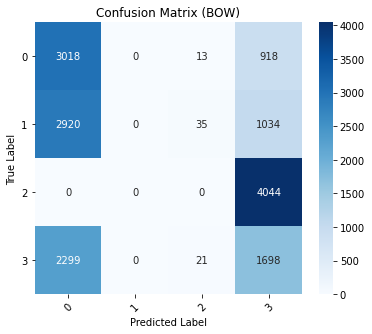

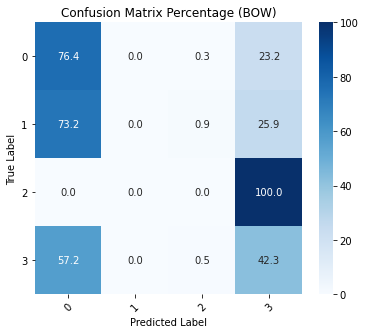

In [0]:
# Random Forest  for BOW Model
cf_tf = confusion_matrix(ytest, rf_pred_bow)
cr_tf = classification_report(ytest, rf_pred_bow)

# Classification Report
print('\t\tRandom Forest (TF-IDF)')
print('\t\t**********************\n')
print('\t\tClassification Report\n\t\t-----------------------\n', cr_tf)


# Confusion Matrix
print("\n")
plt.figure(figsize=(6, 5))
sns.heatmap(cf_tf, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (BOW)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

print("\n")
plt.figure(figsize=(6, 5))
cf_perc = conf_normalize_percentage(cf_tf) * 100
sns.heatmap(cf_perc, annot=True, fmt='.1f', cmap=plt.cm.Blues)
plt.title("Confusion Matrix Percentage (BOW)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [0]:
rf_eval_bow = [round(accuracy_score(ytest, rf_pred_bow),2),
                 round(precision_score(ytest, rf_pred_bow, average='micro'),2),
                 round(recall_score(ytest, rf_pred_bow, average='micro'),2),
                 round(r2_score(ytest, rf_pred_bow),2),
                 #round(roc_auc_score(ytest, rf_pred_bow),2),
                 round(f1_score(ytest, rf_pred_bow, average='micro'),2)
                ]

rf_result_bow = pd.DataFrame(rf_eval_bow, index=metrics, columns=['RF_BOW'])
rf_result_bow.to_csv(RESULT_PATH + '/rf_result_bow.csv')
rf_result_bow

,RF_BOW
Accuracy,0.29
Precision,0.29
Recall,0.29
R-Score,-1.01
F-Measure,0.29


### Compare RF Tokenizer vs Tf-IDF vs BOW

In [0]:
rf_comp = pd.concat([rf_result_tok, rf_result_tfidf, rf_result_bow], axis=1)
rf_comp.to_csv(RESULT_PATH + '/rf_comp.csv')
rf_comp


,RF_Tokenizer,RF_TfIdf,RF_BOW
Accuracy,0.89,0.95,0.29
Precision,0.89,0.95,0.29
Recall,0.89,0.95,0.29
R-Score,0.24,0.67,-1.01
F-Measure,0.89,0.95,0.29


Text(0, 0.5, 'SCORES')

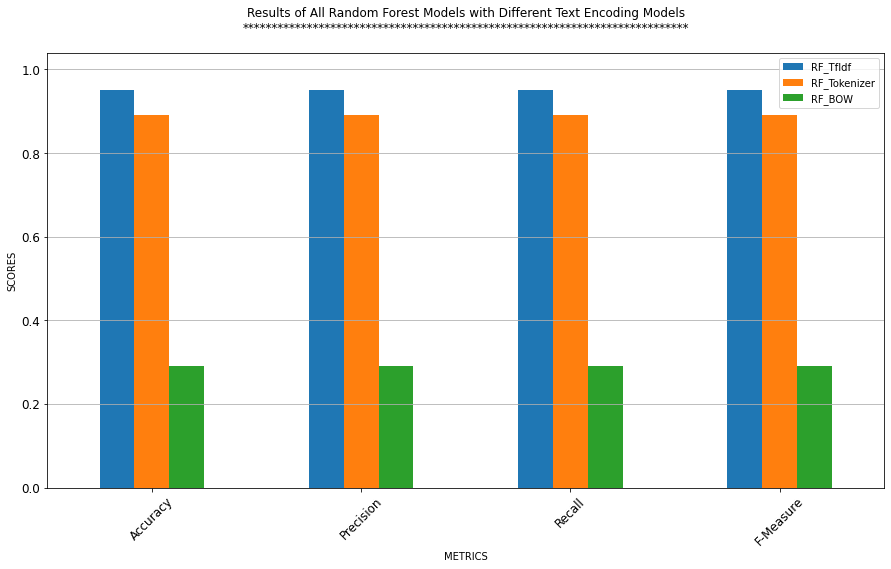

In [0]:
rf_comp.drop('R-Score', axis=0).T.sort_values(by='Accuracy', ascending=False).T.plot.bar(figsize=(15,8),
                             title='Results of All Random Forest Models with Different Text Encoding Models\n****************************************************************************\n',
                             fontsize=12,
                             rot=45,
                             grid=True
                            )


plt.ylim(ymax=1.04)
#plt.legend(loc='lower right')
plt.grid(which='major', axis='x')
plt.xlabel('METRICS')
plt.ylabel('SCORES')

## Compare all Results

### All Tokenizer Results

In [0]:
cmp_all_results_tok = pd.concat([dtree_comp.DTree_Tokenizer, nb_comp.NB_Tokenizer, rf_comp.RF_Tokenizer], axis=1)

cmp_all_results_tok.to_csv(RESULT_PATH + '/cmp_all_results_tok.csv')
cmp_all_results_tok

,DTree_Tokenizer,NB_Tokenizer,RF_Tokenizer
Accuracy,0.84,0.27,0.89
Precision,0.84,0.27,0.89
Recall,0.84,0.27,0.89
R-Score,0.00,-1.48,0.24
F-Measure,0.84,0.27,0.89


Text(0, 0.5, 'SCORES')

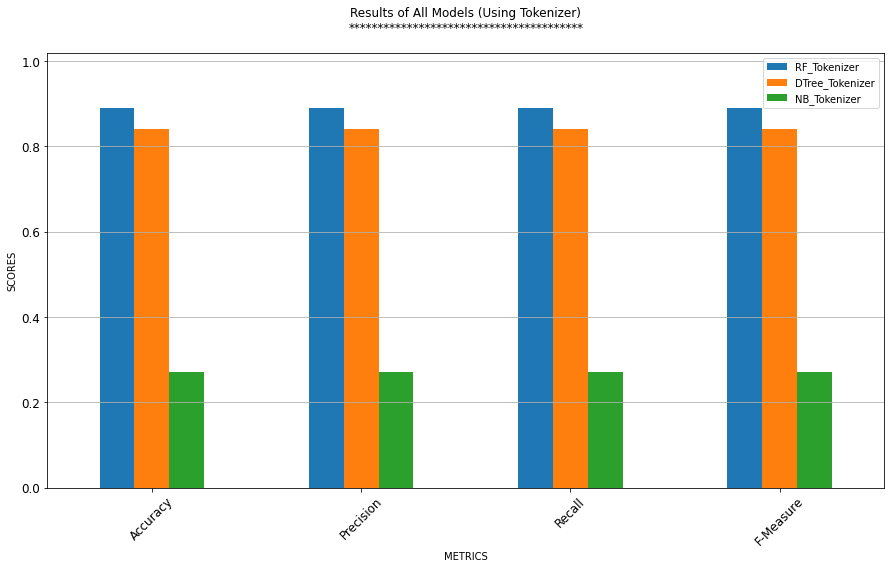

In [0]:
cmp_all_results_tok.drop('R-Score', axis=0).T.sort_values(by='Accuracy', ascending=False).T.plot.bar(figsize=(15,8),
                             title='Results of All Models (Using Tokenizer)\n****************************************\n',
                             fontsize=12,
                             rot=45,
                             grid=True
                            )

plt.ylim(ymax=1.02)
#plt.legend(loc='lower right')
plt.grid(which='major', axis='x')
plt.xlabel('METRICS')
plt.ylabel('SCORES')

### All TF-IDF Results

In [0]:
cmp_all_results_tf = pd.concat([dtree_comp.DTree_TfIdf, nb_comp.NB_TfIdf, rf_comp.RF_TfIdf], axis=1)

cmp_all_results_tf.to_csv(RESULT_PATH + '/cmp_all_results_tf.csv')
cmp_all_results_tf

,DTree_TfIdf,NB_TfIdf,RF_TfIdf
Accuracy,0.93,0.40,0.95
Precision,0.93,0.40,0.95
Recall,0.93,0.40,0.95
R-Score,0.57,-0.29,0.67
F-Measure,0.93,0.40,0.95


Text(0, 0.5, 'SCORES')

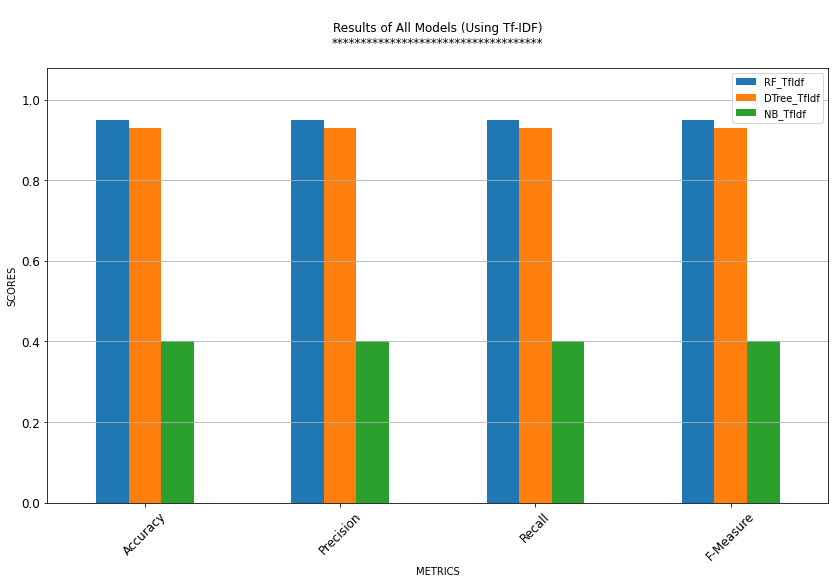

In [0]:
cmp_all_results_tf.drop('R-Score', axis=0).T.sort_values(by='Accuracy', ascending=False).T.plot.bar(figsize=(14,8),
                            title='\nResults of All Models (Using Tf-IDF)\n************************************\n', 
                            fontsize=12,
                            rot=45,
                            grid=True
                           )

plt.ylim(ymax=1.08)
#plt.legend(loc='upper center')
plt.grid(which='major', axis='x')
plt.xlabel('METRICS')
plt.ylabel('SCORES')

### All BOW Results

In [0]:
cmp_all_results_bow = pd.concat([dtree_comp.DTree_BOW, nb_comp.NB_BOW, rf_comp.RF_BOW], axis=1)

cmp_all_results_bow.to_csv(RESULT_PATH + '/cmp_all_results_bow.csv')
cmp_all_results_bow

,DTree_BOW,NB_BOW,RF_BOW
Accuracy,0.29,0.33,0.29
Precision,0.15,0.33,0.29
Recall,0.29,0.33,0.29
R-Score,-1.09,-0.79,-1.01
F-Measure,0.19,0.33,0.29


Text(0, 0.5, 'SCORES')

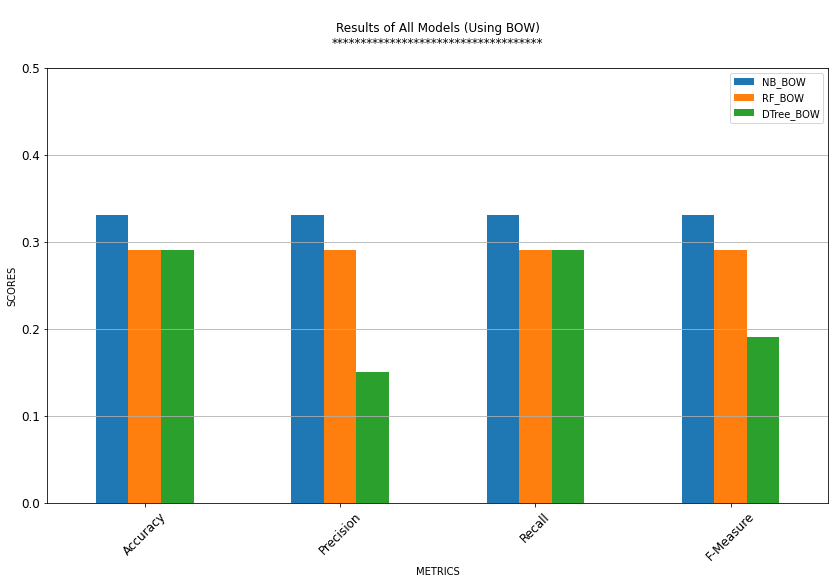

In [12]:
#cmp_all_results_bow = pd.read_csv(RESULT_PATH + '/cmp_all_results_bow.csv', index_col=0)
cmp_all_results_bow.drop('R-Score', axis=0).T.sort_values(by='Precision', ascending=False).T.plot.bar(figsize=(14,8),
                            title='\nResults of All Models (Using BOW)\n************************************\n', 
                            fontsize=12,
                            rot=45,
                            grid=True
                           )

plt.ylim(ymax=0.5)
plt.legend(loc='upper right')
plt.grid(which='major', axis='x')
plt.xlabel('METRICS')
plt.ylabel('SCORES')

Text(0, 0.5, 'SCORES')

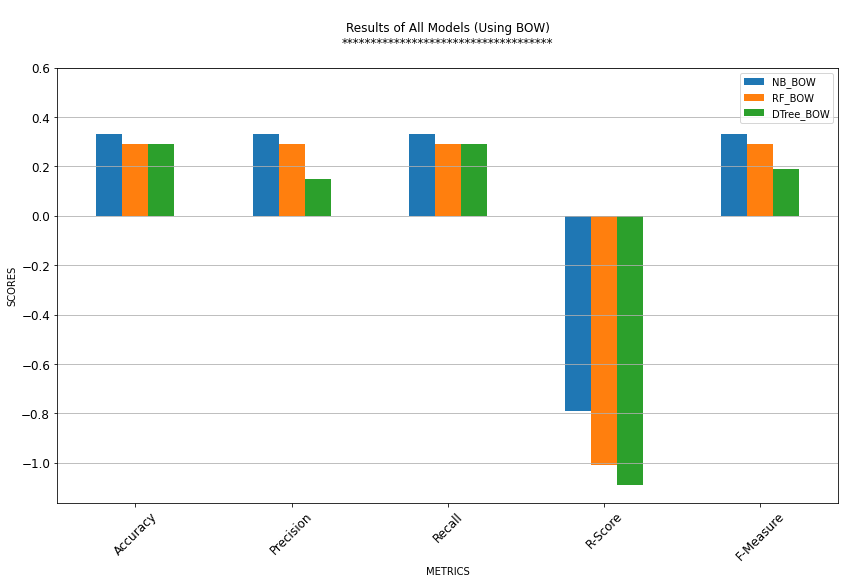

In [10]:
# Showing R-Score in Result

cmp_all_results_bow.T.sort_values(by='Precision', ascending=False).T.plot.bar(figsize=(14,8),
                            title='\nResults of All Models (Using BOW)\n************************************\n', 
                            fontsize=12,
                            rot=45,
                            grid=True
                           )

plt.ylim(ymax=0.6)
plt.legend(loc='upper right')
plt.grid(which='major', axis='x')
plt.xlabel('METRICS')
plt.ylabel('SCORES')

### Combined Results

In [0]:
cmp_all_results_combined = pd.concat([cmp_all_results_tok, cmp_all_results_tf, cmp_all_results_bow], axis=1)
cmp_all_results_combined.to_csv(RESULT_PATH + '/cmp_all_results_combined.csv')
cmp_all_results_combined

,DTree_Tokenizer,NB_Tokenizer,RF_Tokenizer,DTree_TfIdf,NB_TfIdf,RF_TfIdf,DTree_BOW,NB_BOW,RF_BOW
Accuracy,0.84,0.27,0.89,0.93,0.40,0.95,0.29,0.33,0.29
Precision,0.84,0.27,0.89,0.93,0.40,0.95,0.15,0.33,0.29
Recall,0.84,0.27,0.89,0.93,0.40,0.95,0.29,0.33,0.29
R-Score,0.00,-1.48,0.24,0.57,-0.29,0.67,-1.09,-0.79,-1.01
F-Measure,0.84,0.27,0.89,0.93,0.40,0.95,0.19,0.33,0.29


Text(0, 0.5, 'SCORES')

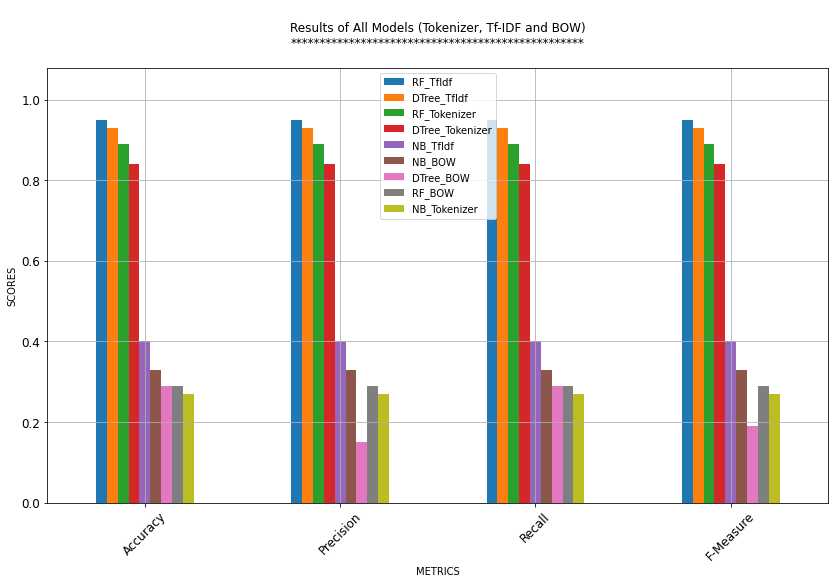

In [17]:
#cmp_all_results_combined = pd.read_csv(RESULT_PATH + '/cmp_all_results_combined.csv', index_col=0)
cmp_all_results_combined.drop('R-Score', axis=0).T.sort_values(by='Accuracy', ascending=False).T.plot.bar(figsize=(14,8),
                                  title='\nResults of All Models (Tokenizer, Tf-IDF and BOW)\n**************************************************\n',
                                  fontsize=12,
                                  rot=45,
                                  grid=True
                                 )
plt.ylim(ymax=1.08)
#plt.legend(loc='upper center')
plt.grid(which='minor', axis='x')
plt.xlabel('METRICS')
plt.ylabel('SCORES')

Text(0, 0.5, 'SCORES')

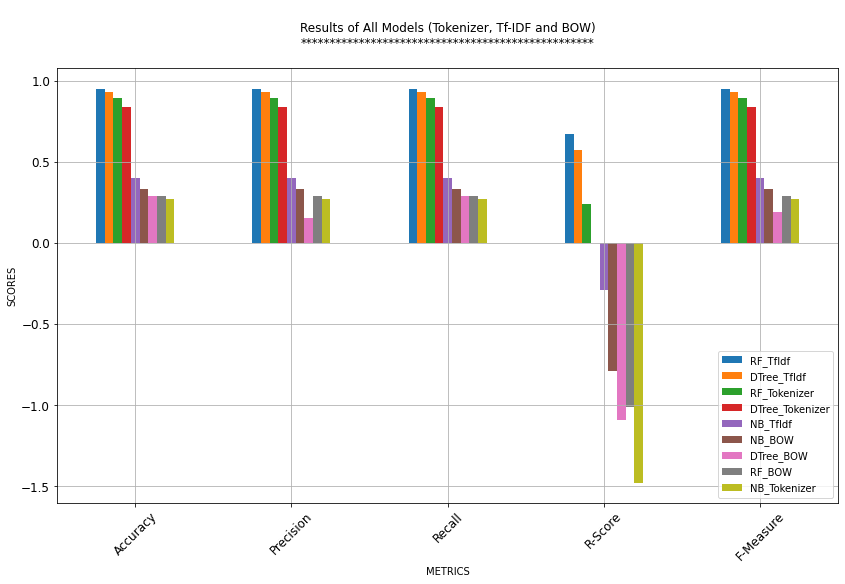

In [13]:
# Showing R-Score in Result

cmp_all_results_combined.T.sort_values(by='Accuracy', ascending=False).T.plot.bar(figsize=(14,8),
                                  title='\nResults of All Models (Tokenizer, Tf-IDF and BOW)\n**************************************************\n',
                                  fontsize=12,
                                  rot=45,
                                  grid=True
                                 )
plt.ylim(ymax=1.08)
plt.legend(loc='lower right')
plt.grid(which='minor', axis='x')
plt.xlabel('METRICS')
plt.ylabel('SCORES')


# ========================= THE END ======================